In [ ]:
# This analysis aims to explore and segment customer behavior patterns using a bunch of unsupervised learning algorithms.
# The goal is to identify meaningful groups of customers based on their financial activity and credit behavior, enabling 
# deeper understanding of customer types and potential detection of their spending patterns.
# The dataset includes several numerical variables related to customer credit usage, such as balance, purchases, payments,
# credit limit, cash advances, and payment frequency. Before applying any clustering model,some data preprocessing and EDA
# will be conducted to ensure data quality and comparability. This includes handling missing values, treating outliers, 
# transforming skewed distributions using log and Box-Cox transformations, and scaling all numerical features for 
# uniformity.
# After preprocessing, multiple clustering techniques will be applied and compared to identify the most suitable approach for
# this dataset.

In [1]:
import pandas as pd
import numpy as np   
df = pd.read_csv('Customer_Data.csv')
df

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0     C10001    40.900749           0.818182      95.40              0.00   
1     C10002  3202.467416           0.909091       0.00              0.00   
2     C10003  2495.148862           1.000000     773.17            773.17   
3     C10004  1666.670542           0.636364    1499.00           1499.00   
4     C10005   817.714335           1.000000      16.00             16.00   
...      ...          ...                ...        ...               ...   
8945  C19186    28.493517           1.000000     291.12              0.00   
8946  C19187    19.183215           1.000000     300.00              0.00   
8947  C19188    23.398673           0.833333     144.40              0.00   
8948  C19189    13.457564           0.833333       0.00              0.00   
8949  C19190   372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                      95.40      0.000000             0.166667   
1                       0.00   6442.945483             0.000000   
2                       0.00      0.000000             1.000000   
3                       0.00    205.788017             0.083333   
4                       0.00      0.000000             0.083333   
...                      ...           ...                  ...   
8945                  291.12      0.000000             1.000000   
8946                  300.00      0.000000             1.000000   
8947                  144.40      0.000000             0.833333   
8948                    0.00     36.558778             0.000000   
8949                    0.00    127.040008             0.666667   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000000                          0.083333   
1                       0.000000                          0.000000   
2                       1.000000                          0.000000   
3                       0.083333                          0.000000   
4                       0.083333                          0.000000   
...                          ...                               ...   
8945                    0.000000                          0.833333   
8946                    0.000000                          0.833333   
8947                    0.000000                          0.666667   
8948                    0.000000                          0.000000   
8949                    0.666667                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000                 0              2        1000.0   
1                   0.250000                 4              0        7000.0   
2                   0.000000                 0             12        7500.0   
3                   0.083333                 1              1        7500.0   
4                   0.000000                 0              1        1200.0   
...                      ...               ...            ...           ...   
8945                0.000000                 0              6        1000.0   
8946                0.000000                 0              6        1000.0   
8947                0.000000                 0              5        1000.0   
8948                0.166667                 2              0         500.0   
8949                0.333333                 2             23        1200.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0      201.802084        139.509787          0.000000      12  
1     4103.032597       1072.340217          0.222222      12  
2      622.066742        627.284787          0.000000      12  
3        0.000000               NaN          0.000000      12  
4      678.334763        244.791237          0.000000      12  
...           ...               ...               ...     ...  
8945   325.594462         48.886365  

In [2]:
df.dtypes

CUST_ID                              object
BALANCE                             float64
BALANCE_FREQUENCY                   float64
PURCHASES                           float64
ONEOFF_PURCHASES                    float64
INSTALLMENTS_PURCHASES              float64
CASH_ADVANCE                        float64
PURCHASES_FREQUENCY                 float64
ONEOFF_PURCHASES_FREQUENCY          float64
PURCHASES_INSTALLMENTS_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY              float64
CASH_ADVANCE_TRX                      int64
PURCHASES_TRX                         int64
CREDIT_LIMIT                        float64
PAYMENTS                            float64
MINIMUM_PAYMENTS                    float64
PRC_FULL_PAYMENT                    float64
TENURE                                int64
dtype: object

In [ ]:
# columns


# 1. CUST_ID: index for the custumers
    
# 2. BALANCE: The avg amount of money that every custmers owed which is shown on their credit card. High amount is 
# showing the custimers had high debt and low balance can show the coustomers pay off the bills often or use the cards
# less.

# 3.BALANCE_FREQUENCY: Showing the frequncy of the cards updated or use. Whether it is active or not active. the value is 
# between 0 and 1 which 1 means the card is highly active. 

# 4. PURCHASES: The total value of all purchases made by the customer during the observation period. If it is high, it 
# means the customer is heavy spender. In other word it is about spending level. 

# 5.ONEOFF_PURCHASES: Amount of purchases made in a single payment, not in installments. It is a kind of shwoing the
# payment inference of the custimers and if the value is high then  customer prefers one-time payments or possibly 
# short-term expenses otherwise customer prefers installment plans.

# 6. INSTALLMENTS_PURCHASES: Total amount of purchases made in installments. if it is high, customer prefers paying in
# parts over time  and they are budget-conscious or large purchases and low value showing rarely uses installment options.
# it is the indication of the financing behavior.

# 7. CASH_ADVANCE: Total amount of cash withdrawn using the credit card. it can be like taking a short term loan.The high
# value is the indicator of customer have liquidity issues and low value shoing the customet most of the time using the 
# card for purchase. It is a good indicator for Good indicator of financial stress or emergency borrowing.

# 8. PURCHASES_FREQUENCY: Measures how often the customer uses the card for shopping. it indicates the sepnding regulari
# and its value is between 0 and 1 in which 1 is the active spender. 

# 9. ONEOFF_PURCHASES_FREQUENCY: It is shwoing if customer often makes single-payment purchases (1 ) or never or 
# rarely does ( 0).

# 10. PURCHASES_INSTALLMENTS_FREQUENCY: It indicates credit usage style. if it is high, the customer frequently pays in 
# installments and low mean prefers full payments.

# 11. CASH_ADVANCE_FREQUENCY: Frequency (0–1) with which the customer takes cash advances. If it is high, it will show 
# the customers relies more on credit for cash and low means they rarly relu on cash.

# 12. CASH_ADVANCE_TRX:Showing how often the person takes out cash. 
# 13. PURCHASES_TRX: Total number of purchase transactions and shows transaction behavior intensity. If it is high,it wil
# show the customers frequently use card  for purchases.

# 14. CREDIT_LIMIT: The maximum credit limit allowed for the customer. id the value is high for this column , it means
# customer has good credit history or income and low value means limited trust or new user. It is Indicator of customer
# risk level or creditworthiness.

# 15. PAYMENTS:Total amount of money paid back by the customer. If it is high, it means the costumers are 
# financially responsible and pays frequently and low means may miss or delay payments.

# 16. MINIMUM_PAYMENTS: The smallest amount a customer must pay on their credit card each month to avoid a late fee. Pay
# off their balance fully or mostly mean low risk), or barely meet the minimum payment  means potentially risky.
# payments, customer pays more than required.If close to total, the customers only pays the minimum (riskier behavior).

# 17. PRC_FULL_PAYMENT: Proportion of months in which the full balance was paid off (0–1).1 = pays full amount every month
# 0 = never pays full amount. It is a good measure of financial discipline.

# 18. TENURE: Number of months the customer has been active (usually 12 in this dataset).Longer tenure  equals 
# loyal customer, shorter means new customer. It is usful for loyalty and retention analysis.


In [ ]:
# Spending behavior: The follwoing columns show how much and how often people buy:

# PURCHASES
# ONEOFF_PURCHASES
# INSTALLMENTS_PURCHASES
# PURCHASES_FREQUENCY
# ONEOFF_PURCHASES_FREQUENCY
# PURCHASES_INSTALLMENTS_FREQUENCY
# PURCHASES_TRX

In [ ]:
# Credit and debt:The follwoing columns show how much debt customers carry or are allowed:

# BALANCE
# BALANCE_FREQUENCY
# CREDIT_LIMIT

In [ ]:
# Cash usage: The following columns show if customers use their card to withdraw cash:

# CASH_ADVANCE
# CASH_ADVANCE_TRX
# CASH_ADVANCE_FREQUENCY

In [ ]:
# Payment behavior: The follwoing columns show how well customers repay:

# PAYMENTS
# MINIMUM_PAYMENTS
# PRC_FULL_PAYMENT

In [ ]:
# Customer profile: 

# TENURE : how long the customer has been active
# CUST_ID : just an identifier (not used in clustering)

In [3]:
df.describe()

BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   8950.000000        8950.000000   8950.000000       8950.000000   
mean    1564.474828           0.877271   1003.204834        592.437371   
std     2081.531879           0.236904   2136.634782       1659.887917   
min        0.000000           0.000000      0.000000          0.000000   
25%      128.281915           0.888889     39.635000          0.000000   
50%      873.385231           1.000000    361.280000         38.000000   
75%     2054.140036           1.000000   1110.130000        577.405000   
max    19043.138560           1.000000  49039.570000      40761.250000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             8950.000000   8950.000000          8950.000000   
mean               411.067645    978.871112             0.490351   
std                904.338115   2097.163877             0.401371   
min                  0.000000      0.000000             0.000000   
25%                  0.000000      0.000000             0.083333   
50%                 89.000000      0.000000             0.500000   
75%                468.637500   1113.821139             0.916667   
max              22500.000000  47137.211760             1.000000   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                 8950.000000                       8950.000000   
mean                     0.202458                          0.364437   
std                      0.298336                          0.397448   
min                      0.000000                          0.000000   
25%                      0.000000                          0.000000   
50%                      0.083333                          0.166667   
75%                      0.300000                          0.750000   
max                      1.000000                          1.000000   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count             8950.000000       8950.000000    8950.000000   8949.000000   
mean                 0.135144          3.248827      14.709832   4494.449450   
std                  0.200121          6.824647      24.857649   3638.815725   
min                  0.000000          0.000000       0.000000     50.000000   
25%                  0.000000          0.000000       1.000000   1600.000000   
50%                  0.000000          0.000000       7.000000   3000.000000   
75%                  0.222222          4.000000      17.000000   6500.000000   
max                  1.500000        123.000000     358.000000  30000.000000   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT       TENURE  
count   8950.000000       8637.000000       8950.000000  8950.000000  
mean    1733.143852        864.206542          0.153715    11.517318  
std     2895.063757       2372.446607          0.292499     1.338331  
min        0.000000          0.019163          0.000000     6.000000  
25%      383.276166        169.123707          0.000000    12.000000  
50%      856.901546        312.343947          0.000000    12.000000  
75%     1901.134317        825.485459          0.142857    12.000000  
max    50721.483360      76406.207520          1.000000    12.000000

In [4]:
len(df)

8950

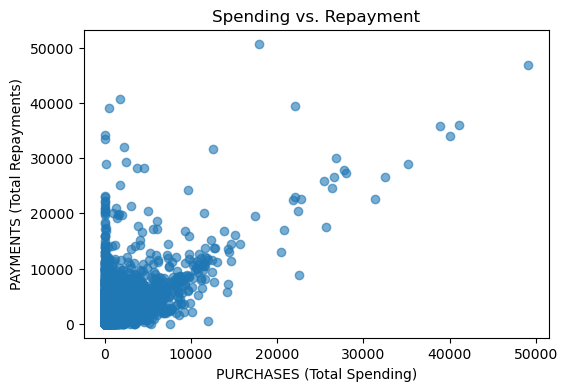

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.scatter(df["PURCHASES"], df["PAYMENTS"], alpha=0.6)
plt.xlabel("PURCHASES (Total Spending)")
plt.ylabel("PAYMENTS (Total Repayments)")
plt.title("Spending vs. Repayment")
plt.show()


In [ ]:
# This plot displays how customers behave in spending and repayment. Those in the bottom-left spend and pay little, likely 
# inactive or new users. The top-right group spends and pays a lot, showing healthy, active usage which are very few.
# Points far right but low are heavy spenders who don’t repay much and are potentially risky, while top-left customers pay
# more than they spend, likely settling previous debts.

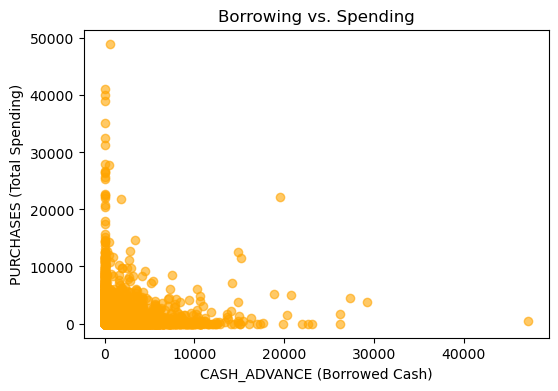

In [7]:
plt.figure(figsize=(6,4))
plt.scatter(df["CASH_ADVANCE"], df["PURCHASES"], alpha=0.6, color='orange')
plt.xlabel("CASH_ADVANCE (Borrowed Cash)")
plt.ylabel("PURCHASES (Total Spending)")
plt.title("Borrowing vs. Spending")
plt.show()

In [ ]:
# This plot shows the relationship between borrowing and spending. Most customers have low cash advances and low purchase
# amounts, meaning they rarely use their card to borrow cash. A few on the right borrow large amounts but spend little,
# suggesting they mainly use credit cards for emergency cash rather than shopping. Overall, high borrowing with low 
# spending may signal financial stress or liquidity problems.

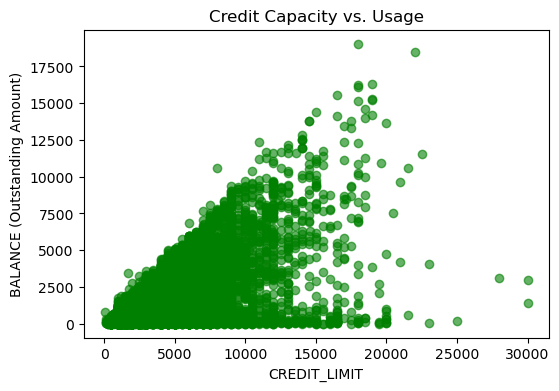

In [8]:
plt.figure(figsize=(6,4))
plt.scatter(df["CREDIT_LIMIT"], df["BALANCE"], alpha=0.6, color='green')
plt.xlabel("CREDIT_LIMIT")
plt.ylabel("BALANCE (Outstanding Amount)")
plt.title("Credit Capacity vs. Usage")
plt.show()

In [ ]:
# This plot shows how customers use their available credit. Most points form an upward triangle, meaning higher credit 
# limits often come with higher balances, but not always full utilization. Customers near the top edge use much of their
# limit and may be at higher financial risk, while those far below the diagonal use only a small part of their credit, 
# showing safer, more controlled spending.

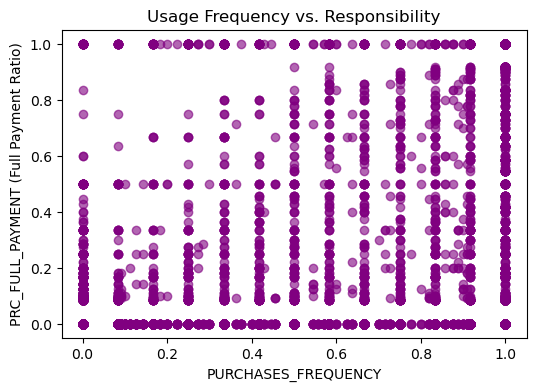

In [9]:
plt.figure(figsize=(6,4))
plt.scatter(df["PURCHASES_FREQUENCY"], df["PRC_FULL_PAYMENT"], alpha=0.6, color='purple')
plt.xlabel("PURCHASES_FREQUENCY")
plt.ylabel("PRC_FULL_PAYMENT (Full Payment Ratio)")
plt.title("Usage Frequency vs. Responsibility")
plt.show()

In [ ]:
# This plot shows how often customers make purchases compared to how responsibly they pay their bills. Many customers have
# high purchase frequency but low full-payment ratios, meaning they use their cards a lot but rarely clear their balance. 
# Only a few combine frequent use with full repayment, showing strong financial discipline. Overall, it highlights 
# different spending habits and responsibility levels across users.

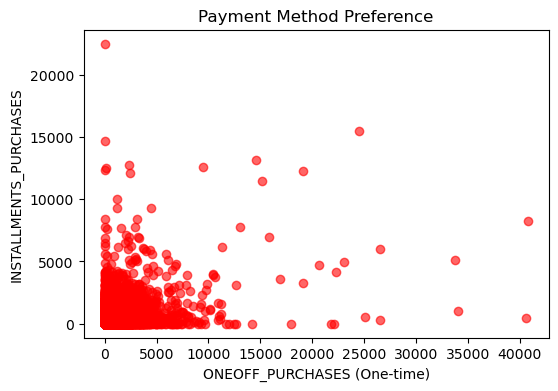

In [10]:
plt.figure(figsize=(6,4))
plt.scatter(df["ONEOFF_PURCHASES"], df["INSTALLMENTS_PURCHASES"], alpha=0.6, color='red')
plt.xlabel("ONEOFF_PURCHASES (One-time)")
plt.ylabel("INSTALLMENTS_PURCHASES")
plt.title("Payment Method Preference")
plt.show()

In [ ]:
# This plot compares customers preference for one-time versus installment purchases. Most points cluster near the 
# bottom-left, meaning most customers make small one-time purchases and rarely use installment plans.Most customers make 
# small one-time payments and rarely buy in installments A few toward the
# right rely more on one-off payments, while some higher up use installments more often, possibly for larger or planned
# purchases. It reveals each customer’s preferred payment style and credit usage pattern.

# The point far left (close to the x-axis origin, around 0 on ONEOFF_PURCHASES) means that customer didn’t make any 
# one-time purchases, but they might still have installment purchases.
# The point far above (very high INSTALLMENTS_PURCHASES value) represents a customer who spent a large amount using
# installments — likely a heavy buyer who prefers paying over time.

# It means They didn’t buy anything they paid for all at once, but they made a big purchase that they chose to pay in
# parts over time.They only use their credit card for big, planned purchases paid gradually, not for everyday shopping.

# Notice: the value in INSTALLMENTS_PURCHASES is the sum of all installment purchases a person made during the entire
# period in the dataset, not just one single item or plan.
# The number shows the total dollar amount of all those installment-based purchases combined.

In [11]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [13]:
# filling the CREDIT_LIMIT with MOde 
mode_value = df['CREDIT_LIMIT'].mode()[0] 
df['CREDIT_LIMIT'] = df['CREDIT_LIMIT'].fillna(mode_value)

print(df['CREDIT_LIMIT'].isnull().sum())
print(mode_value)

0
3000.0


In [14]:
# The two methos of filling missing value for Min Payment would be evaluated: 1- Median 2: KNN

from sklearn.impute import KNNImputer

# Median 
df1 = df.copy()
median_value = df1['MINIMUM_PAYMENTS'].median()
df1['MINIMUM_PAYMENTS'] = df1['MINIMUM_PAYMENTS'].fillna(median_value)

# KNN
df2 = df.copy()

num_cols = df2.select_dtypes(include=['float64', 'int64']).columns

imputer = KNNImputer(n_neighbors=5)
df2[num_cols] = imputer.fit_transform(df2[num_cols])

print("Missing values in df1 (median method):")
print(df1['MINIMUM_PAYMENTS'].isnull().sum())

print("\nMissing values in df2 (KNN method):")
print(df2['MINIMUM_PAYMENTS'].isnull().sum())

Missing values in df1 (median method):
0

Missing values in df2 (KNN method):
0


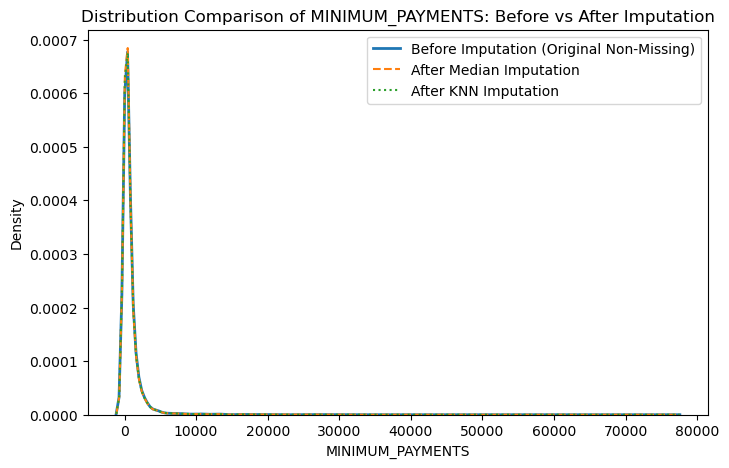

In [15]:
# Visulizing both methods with original Min Payment to see which one perform better. 

import seaborn as sns
import matplotlib.pyplot as plt

original_non_missing = df['MINIMUM_PAYMENTS'].dropna()

plt.figure(figsize=(8,5))
sns.kdeplot(original_non_missing, label='Before Imputation (Original Non-Missing)', linewidth=2)
sns.kdeplot(df1['MINIMUM_PAYMENTS'], label='After Median Imputation', linestyle='--')
sns.kdeplot(df2['MINIMUM_PAYMENTS'], label='After KNN Imputation', linestyle=':')
plt.legend()
plt.title("Distribution Comparison of MINIMUM_PAYMENTS: Before vs After Imputation")
plt.xlabel("MINIMUM_PAYMENTS")
plt.ylabel("Density")
plt.show()


In [ ]:
# Both imputation methods (median and Knn) distribution seems like the original one.
# both perform well. for simplicity, the median approch will be kept.

In [16]:
# Another method to check their performance is Corrolation Criteria 
# if both imputation methods preserve the same correlation patterns, then both are fine.
# If one changes correlations drastically, it might be distorting multi-variable relationships.
corr_before = df.corr(numeric_only=True)['MINIMUM_PAYMENTS']
corr_median = df1.corr(numeric_only=True)['MINIMUM_PAYMENTS']
corr_knn = df2.corr(numeric_only=True)['MINIMUM_PAYMENTS']

comparison = pd.DataFrame({
    'Before': corr_before,
    'After_Median': corr_median,
    'After_KNN': corr_knn
})

print(comparison)

                                    Before  After_Median  After_KNN
BALANCE                           0.398684      0.397920   0.400514
BALANCE_FREQUENCY                 0.132569      0.131181   0.137702
PURCHASES                         0.093860      0.095789   0.095084
ONEOFF_PURCHASES                  0.048755      0.050256   0.050064
INSTALLMENTS_PURCHASES            0.132172      0.134019   0.132704
CASH_ADVANCE                      0.140107      0.140747   0.141165
PURCHASES_FREQUENCY               0.003030      0.006154   0.005053
ONEOFF_PURCHASES_FREQUENCY       -0.030327     -0.027311  -0.027291
PURCHASES_INSTALLMENTS_FREQUENCY  0.030073      0.032055   0.030875
CASH_ADVANCE_FREQUENCY            0.098838      0.100616   0.102743
CASH_ADVANCE_TRX                  0.109739      0.111251   0.111752
PURCHASES_TRX                     0.096333      0.098722   0.097950
CREDIT_LIMIT                      0.126686      0.126765   0.125305
PAYMENTS                          0.126651      

In [17]:
# it showing no difference and we go with median.
df1

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0     C10001    40.900749           0.818182      95.40              0.00   
1     C10002  3202.467416           0.909091       0.00              0.00   
2     C10003  2495.148862           1.000000     773.17            773.17   
3     C10004  1666.670542           0.636364    1499.00           1499.00   
4     C10005   817.714335           1.000000      16.00             16.00   
...      ...          ...                ...        ...               ...   
8945  C19186    28.493517           1.000000     291.12              0.00   
8946  C19187    19.183215           1.000000     300.00              0.00   
8947  C19188    23.398673           0.833333     144.40              0.00   
8948  C19189    13.457564           0.833333       0.00              0.00   
8949  C19190   372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                      95.40      0.000000             0.166667   
1                       0.00   6442.945483             0.000000   
2                       0.00      0.000000             1.000000   
3                       0.00    205.788017             0.083333   
4                       0.00      0.000000             0.083333   
...                      ...           ...                  ...   
8945                  291.12      0.000000             1.000000   
8946                  300.00      0.000000             1.000000   
8947                  144.40      0.000000             0.833333   
8948                    0.00     36.558778             0.000000   
8949                    0.00    127.040008             0.666667   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000000                          0.083333   
1                       0.000000                          0.000000   
2                       1.000000                          0.000000   
3                       0.083333                          0.000000   
4                       0.083333                          0.000000   
...                          ...                               ...   
8945                    0.000000                          0.833333   
8946                    0.000000                          0.833333   
8947                    0.000000                          0.666667   
8948                    0.000000                          0.000000   
8949                    0.666667                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000                 0              2        1000.0   
1                   0.250000                 4              0        7000.0   
2                   0.000000                 0             12        7500.0   
3                   0.083333                 1              1        7500.0   
4                   0.000000                 0              1        1200.0   
...                      ...               ...            ...           ...   
8945                0.000000                 0              6        1000.0   
8946                0.000000                 0              6        1000.0   
8947                0.000000                 0              5        1000.0   
8948                0.166667                 2              0         500.0   
8949                0.333333                 2             23        1200.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0      201.802084        139.509787          0.000000      12  
1     4103.032597       1072.340217          0.222222      12  
2      622.066742        627.284787          0.000000      12  
3        0.000000        312.343947          0.000000      12  
4      678.334763        244.791237          0.000000      12  
...           ...               ...               ...     ...  
8945   325.594462         48.886365  

In [ ]:
# Trying visualization and see which variables are normally distributed , have outliers and also the realtionship betw
# different variables which are the most imporatnt section for unsupervised learning. 

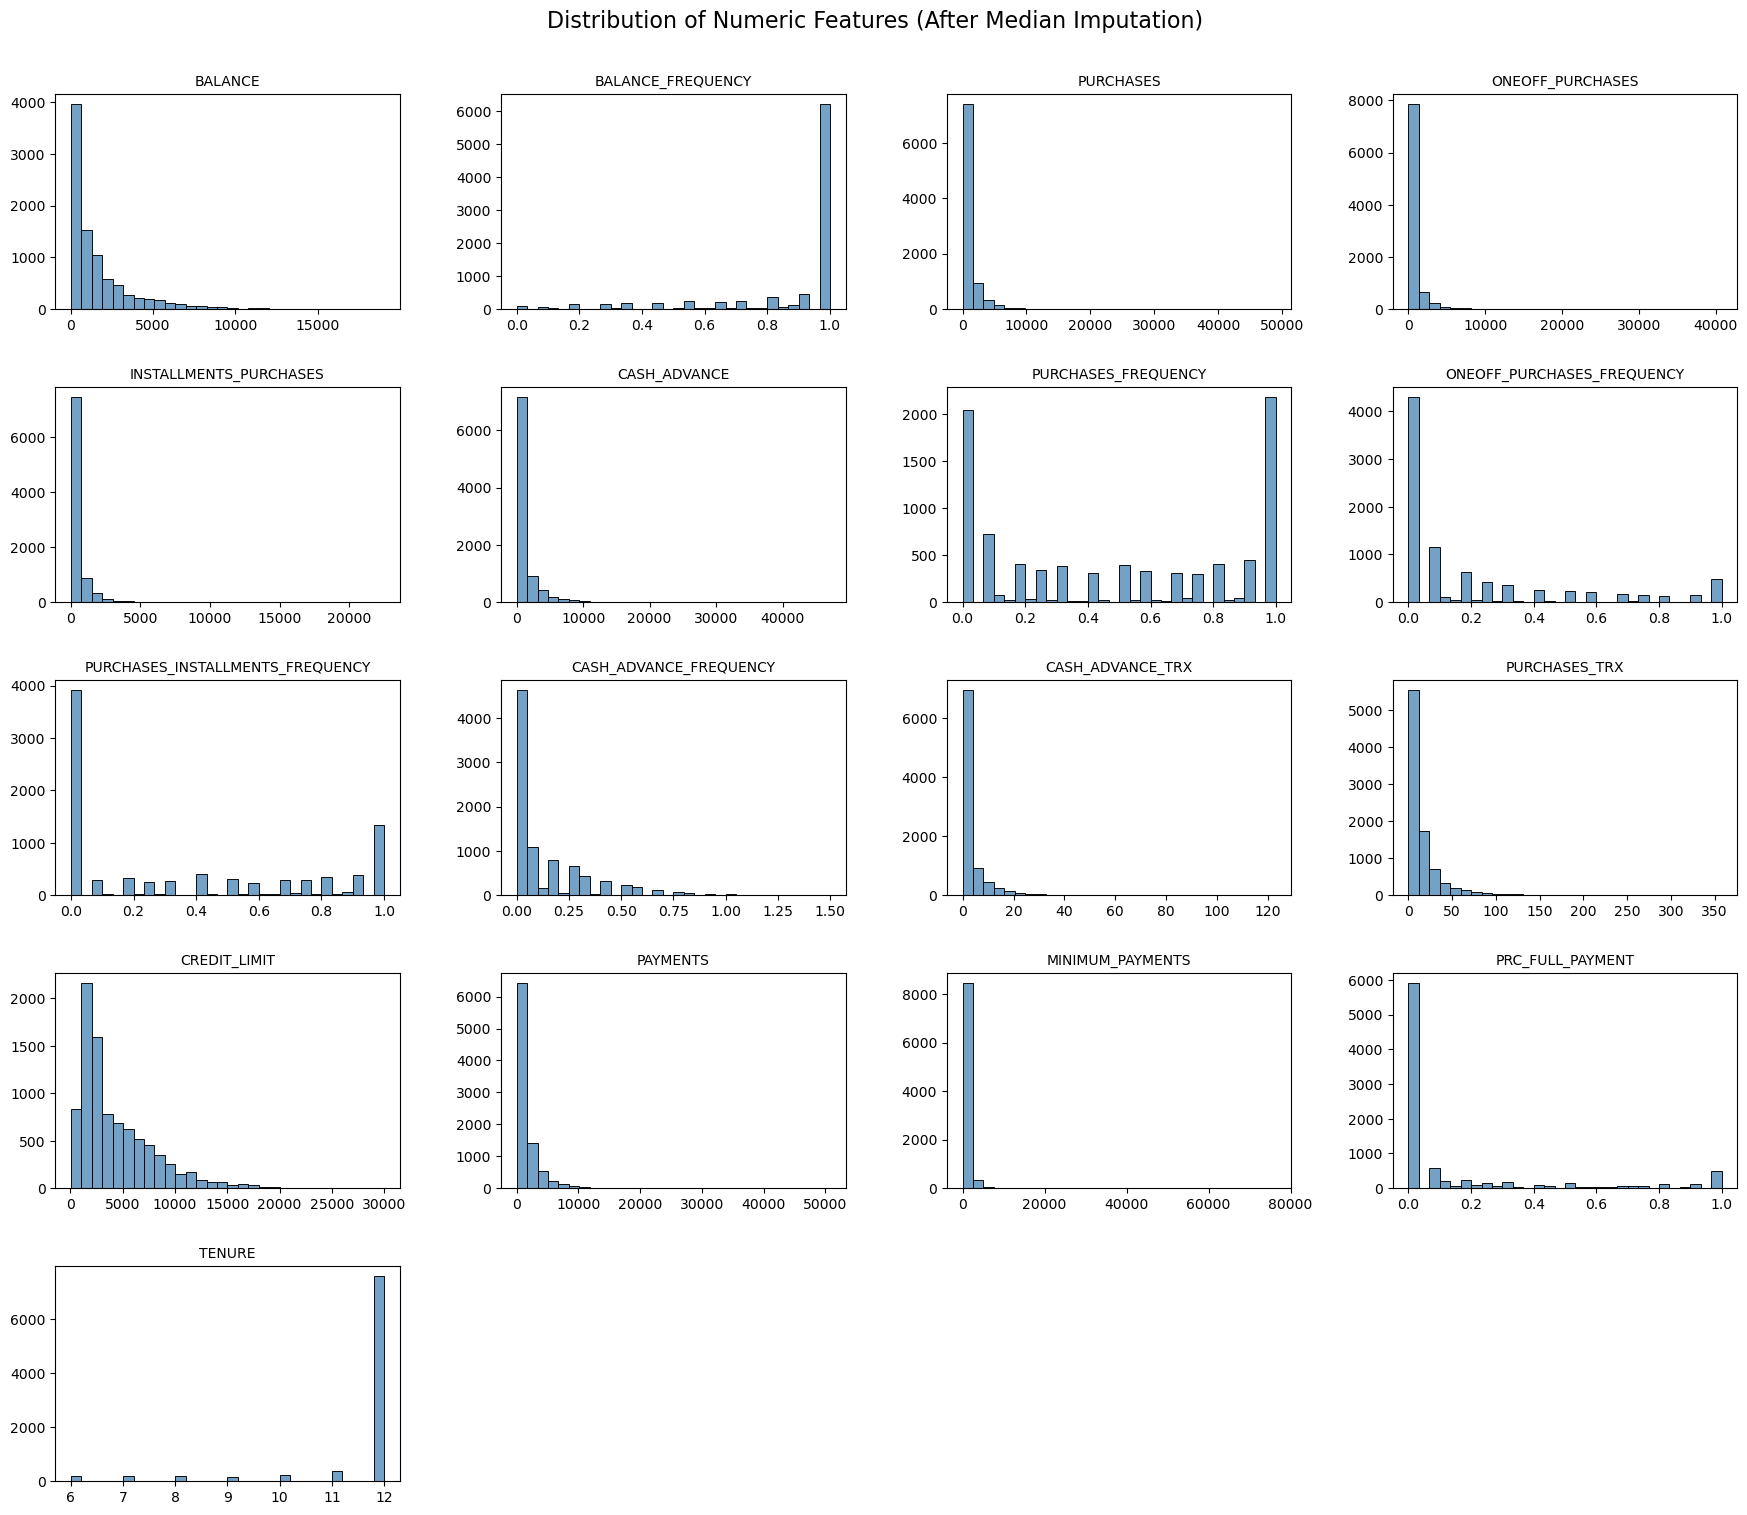

In [19]:
numeric_cols = df1.select_dtypes(include=['float64', 'int64']).columns

n_cols = 4
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols 

plt.figure(figsize=(18, n_rows * 3)) 

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.histplot(df1[col], bins=30, kde=False, color='steelblue')
    plt.title(col, fontsize=10)
    plt.xlabel('')
    plt.ylabel('')

plt.tight_layout(pad=2.5) 
plt.suptitle("Distribution of Numeric Features (After Median Imputation)", fontsize=16, y=1.02)
plt.show()

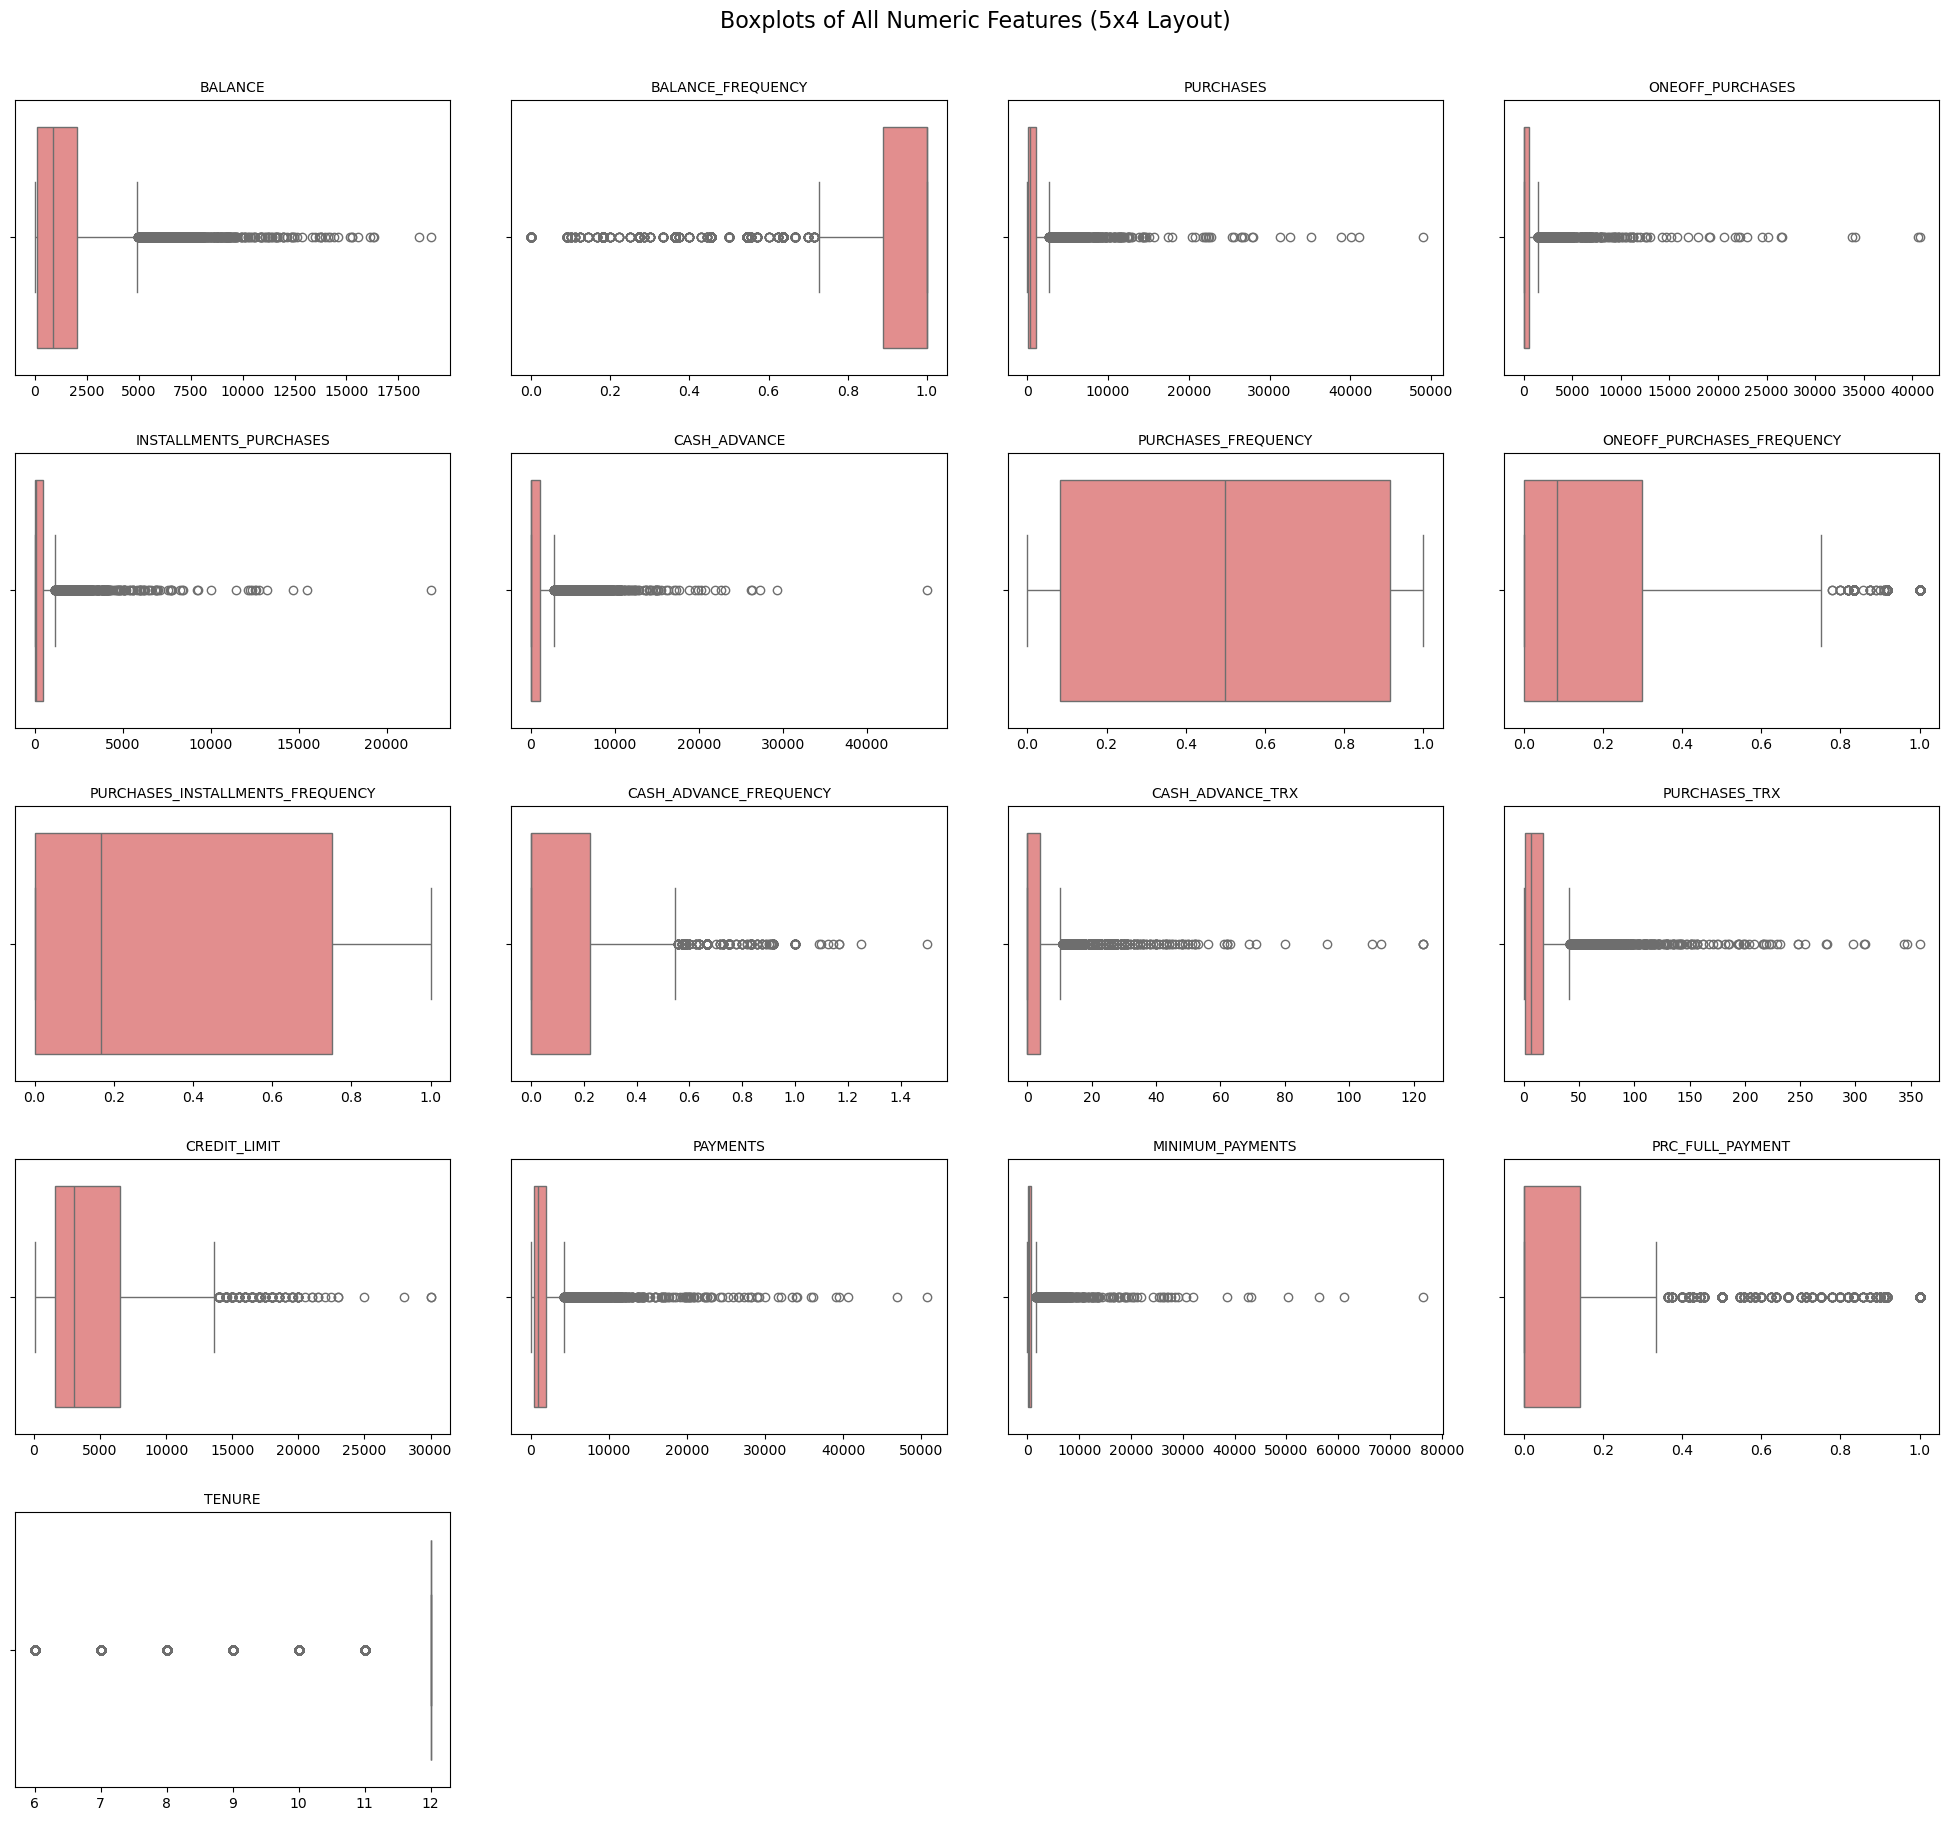

In [20]:
numeric_cols = df1.select_dtypes(include=['float64', 'int64']).columns

rows, cols = 5, 4

plt.figure(figsize=(20, 18))

for i, col in enumerate(numeric_cols):
    plt.subplot(rows, cols, i + 1)
    sns.boxplot(x=df1[col], color='lightcoral')
    plt.title(f"{col}", fontsize=10)
    plt.xlabel('')
    plt.ylabel('')

plt.tight_layout(pad=2.5)
plt.suptitle("Boxplots of All Numeric Features (5x4 Layout)", fontsize=16, y=1.02)
plt.show()

In [ ]:
# TENURE variable (number of months as a customer) is almost constant across rows likely all 12 or very close to it.
# Since the clustering works based on variation across features and distance calculation, we need to remove it for the
# sake of simplicity and not intriducing noise. 
# for the rest with continous (unbounded) features, log or cox box and sqrt trasformation would be applied to make them
# see normalized. 

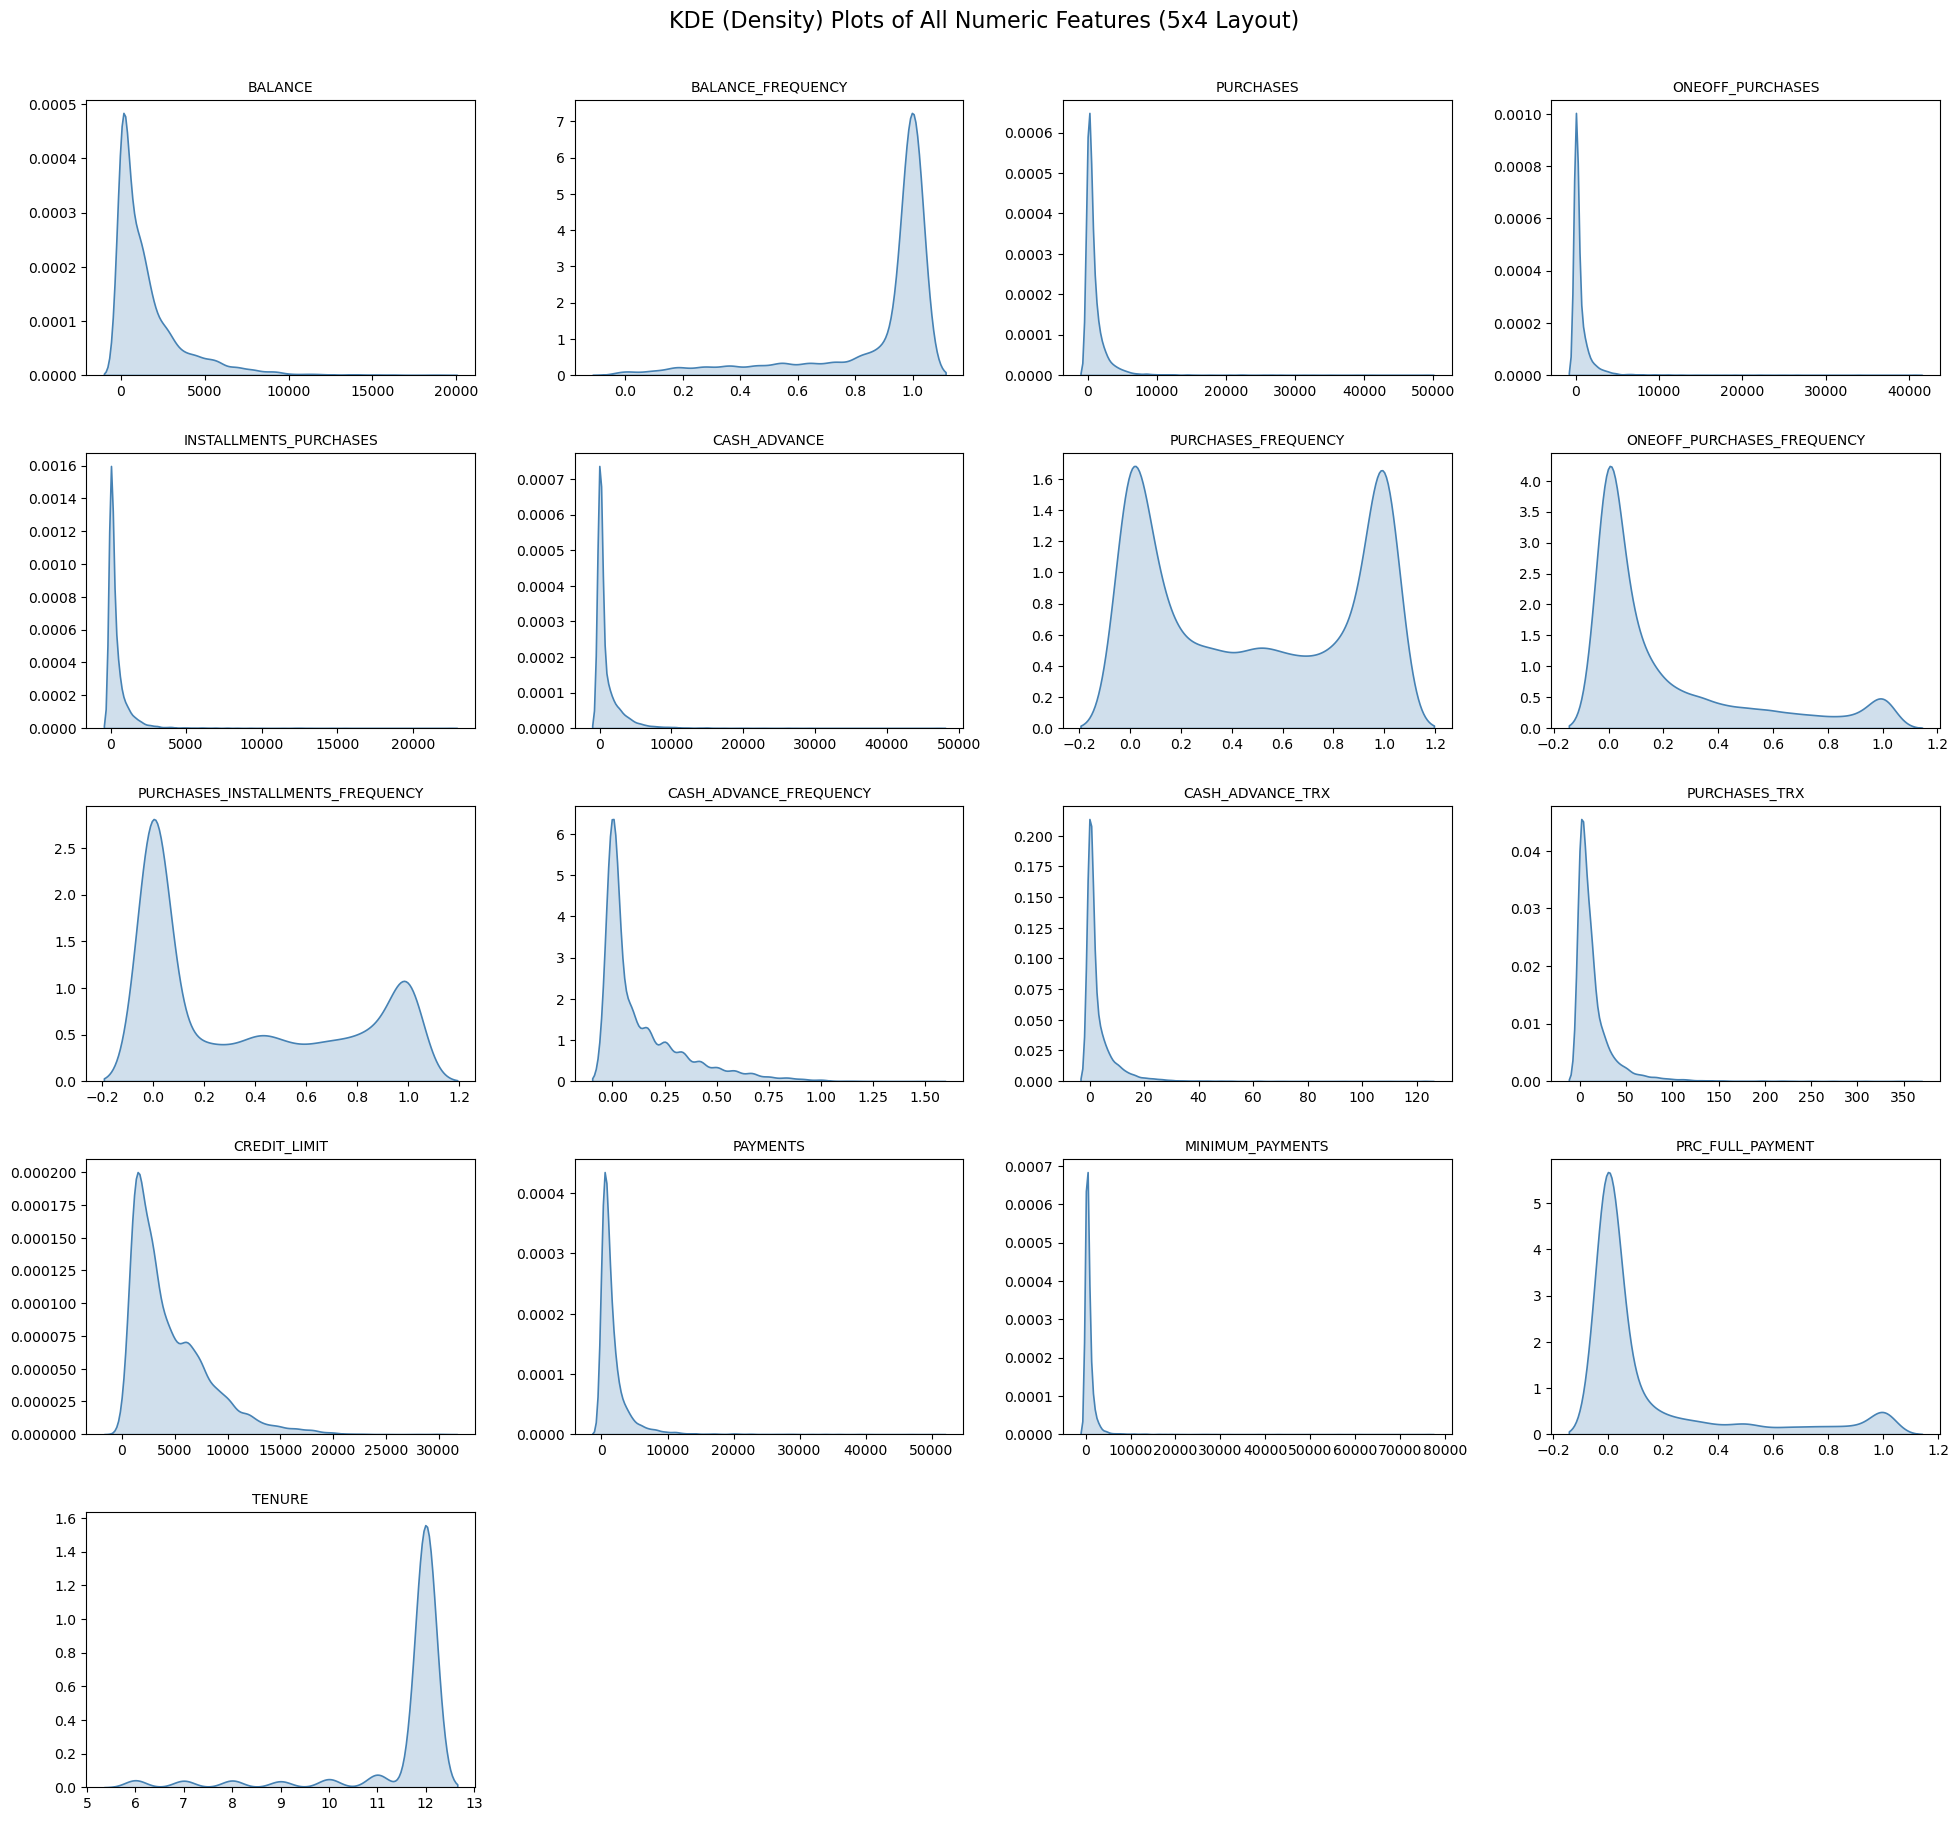

In [21]:
# pairwise corrolation matrix before transformation 

numeric_cols = df1.select_dtypes(include=['float64', 'int64']).columns

rows, cols = 5, 4

plt.figure(figsize=(20, 18))

for i, col in enumerate(numeric_cols):
    plt.subplot(rows, cols, i + 1)
    sns.kdeplot(df1[col], fill=True, color='steelblue', linewidth=1.2)
    plt.title(f"{col}", fontsize=10)
    plt.xlabel('')
    plt.ylabel('')

plt.tight_layout(pad=2.5)
plt.suptitle("KDE (Density) Plots of All Numeric Features (5x4 Layout)", fontsize=16, y=1.02)
plt.show()

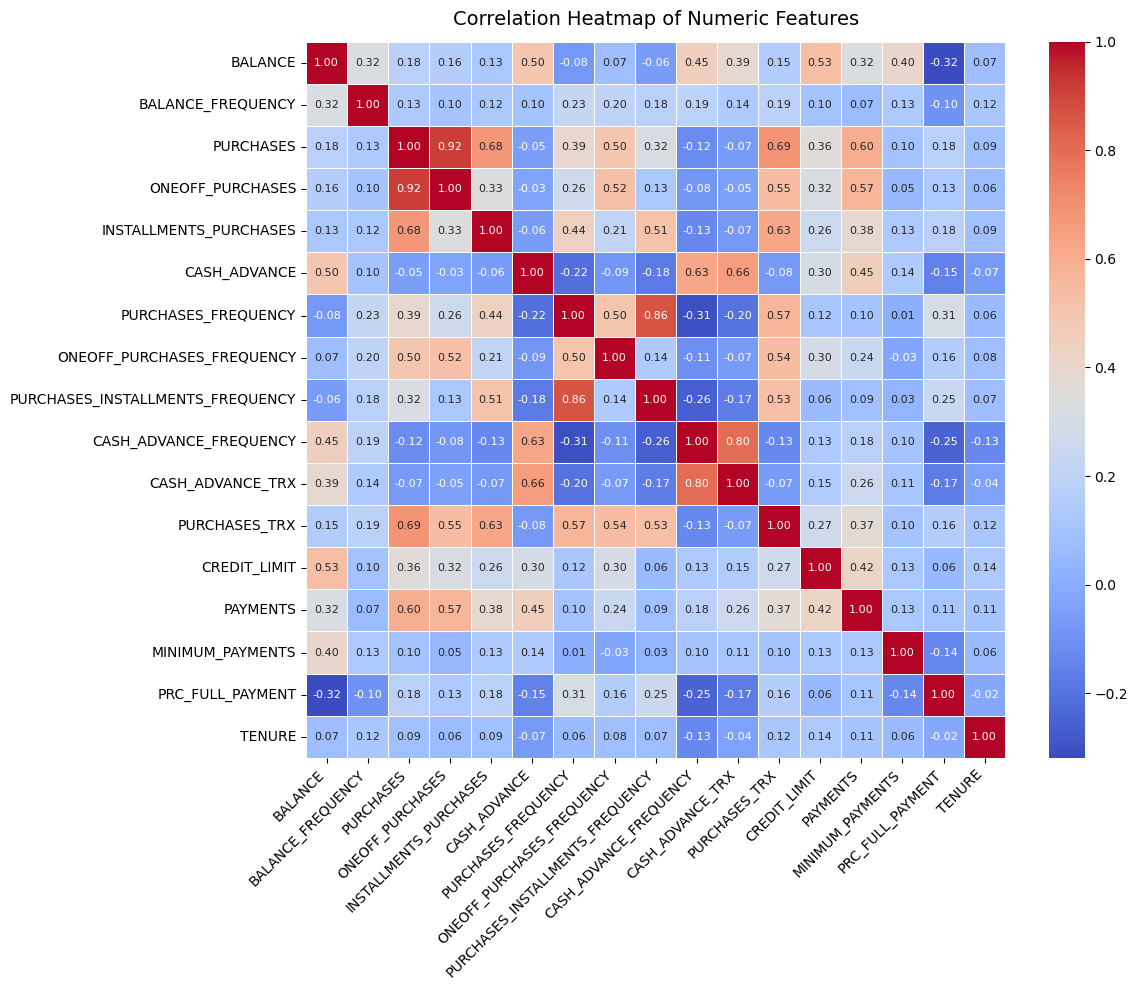

In [22]:
# Heatmap corrolation

plt.figure(figsize=(12, 10))
sns.heatmap(
    df1[numeric_cols].corr(),
    cmap='coolwarm',
    annot=True,           
    fmt=".2f",            
    annot_kws={"size": 8},
    linewidths=0.5        
)
plt.title("Correlation Heatmap of Numeric Features", fontsize=14, pad=12)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

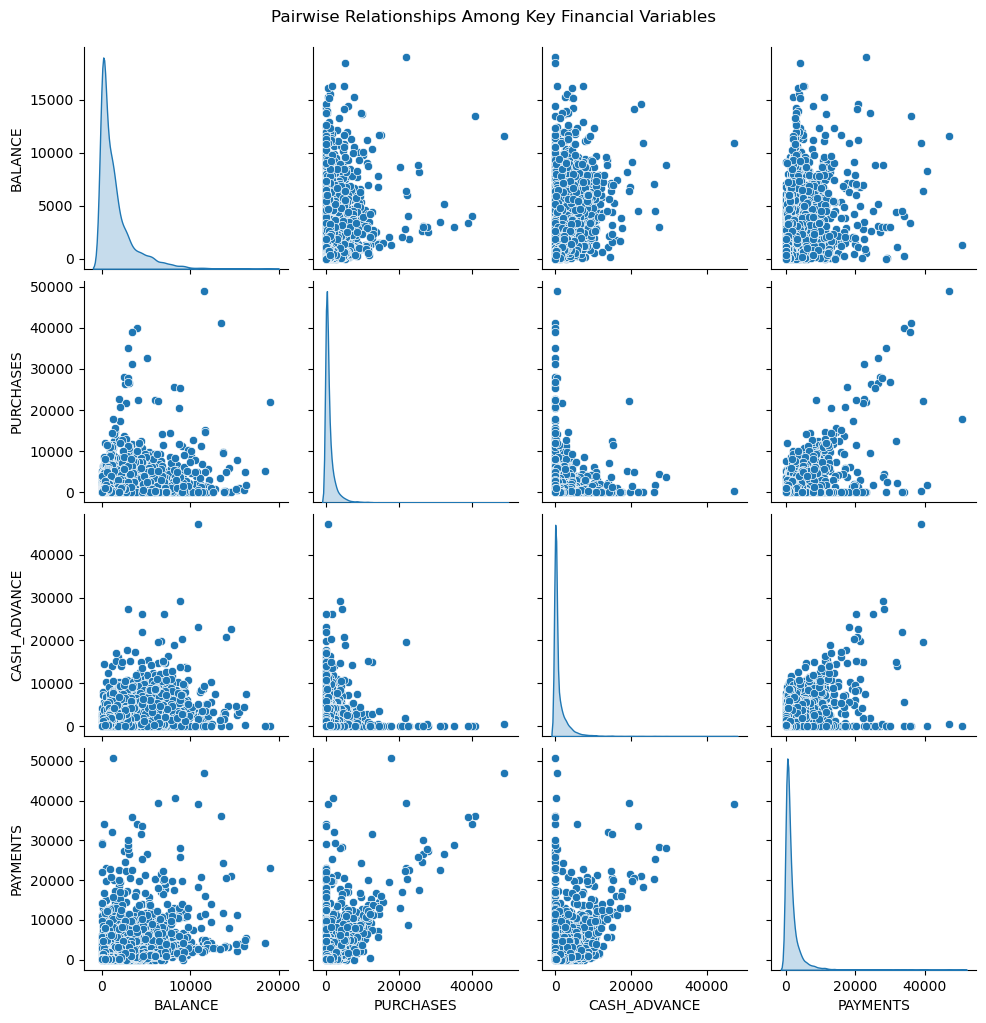

In [23]:
# Pair Plot (Feature Interactions)
sns.pairplot(df1[['BALANCE', 'PURCHASES', 'CASH_ADVANCE', 'PAYMENTS']], diag_kind='kde')
plt.suptitle("Pairwise Relationships Among Key Financial Variables", y=1.02)
plt.show()


In [24]:
# Removing TENURE column
df1 = df1.drop(columns=['TENURE'])

In [25]:
# square root transformation to transaction count features. this transformation method is used for the foloowing
# variables because their magnitudes are limited. 

df1['CASH_ADVANCE_TRX'] = np.sqrt(df1['CASH_ADVANCE_TRX'])
df1['PURCHASES_TRX'] = np.sqrt(df1['PURCHASES_TRX'])

df1[['CASH_ADVANCE_TRX', 'PURCHASES_TRX']].head()

CASH_ADVANCE_TRX  PURCHASES_TRX
0               0.0       1.414214
1               2.0       0.000000
2               0.0       3.464102
3               1.0       1.000000
4               0.0       1.000000

In [26]:
# applying log trans

df3 = df1.copy()

log_features = ['BALANCE', 'PURCHASES', 'CASH_ADVANCE', 'PAYMENTS', 'MINIMUM_PAYMENTS']

df3[log_features] = np.log1p(df3[log_features])

df3[log_features].head()

BALANCE  PURCHASES  CASH_ADVANCE  PAYMENTS  MINIMUM_PAYMENTS
0  3.735304   4.568506      0.000000  5.312231          4.945277
1  8.071989   0.000000      8.770896  8.319725          6.978531
2  7.822504   6.651791      0.000000  6.434654          6.442994
3  7.419183   7.313220      5.331694  0.000000          5.747301
4  6.707735   2.833213      0.000000  6.521114          5.504483

In [27]:
# Applying Box-cCox

from scipy.stats import boxcox

df4 = df1.copy()

for col in ['BALANCE', 'PURCHASES', 'CASH_ADVANCE', 'PAYMENTS', 'MINIMUM_PAYMENTS']:
    df4[col], _ = boxcox(df4[col] + 1)

df4[['BALANCE', 'PURCHASES', 'CASH_ADVANCE', 'PAYMENTS', 'MINIMUM_PAYMENTS']].head()

BALANCE  PURCHASES  CASH_ADVANCE   PAYMENTS  MINIMUM_PAYMENTS
0   5.524100   6.874084      0.000000   9.475916          4.373865
1  19.863823   0.000000      6.190043  21.433774          5.877234
2  18.665676  12.252611      0.000000  13.123324          5.496177
3  16.849318  14.393644      4.290456   0.000000          4.985453
4  13.977587   3.629361      0.000000  13.439781          4.802909

In [28]:
# Evaluating 


features = ['BALANCE', 'PURCHASES', 'CASH_ADVANCE', 'PAYMENTS', 'MINIMUM_PAYMENTS']

comparison = pd.DataFrame({
    'Feature': features,
    'Skew_Before': df1[features].skew(),
    'Skew_Log': df3[features].skew(),
    'Skew_BoxCox': df4[features].skew(),
    'Kurt_Before': df1[features].kurt(),
    'Kurt_Log': df3[features].kurt(),
    'Kurt_BoxCox': df4[features].kurt()
}).round(2)

comparison

Feature  Skew_Before  Skew_Log  Skew_BoxCox  \
BALANCE                    BALANCE         2.39     -0.86        -0.12   
PURCHASES                PURCHASES         8.14     -0.76        -0.18   
CASH_ADVANCE          CASH_ADVANCE         5.17      0.26         0.19   
PAYMENTS                  PAYMENTS         5.91     -1.78         0.12   
MINIMUM_PAYMENTS  MINIMUM_PAYMENTS        13.85      0.27        -0.03   

                  Kurt_Before  Kurt_Log  Kurt_BoxCox  
BALANCE                  7.67      0.17        -0.78  
PURCHASES              111.39     -0.82        -0.76  
CASH_ADVANCE            52.90     -1.73        -1.84  
PAYMENTS                54.77      6.06         1.33  
MINIMUM_PAYMENTS       293.72      1.28         1.68

In [ ]:
# Before transformation all features were strongly right-skewed (2–14 range) but after transformation Box–Cox achieved 
# near 0 skew (best for 4 of 5 features) and Log improved but remained slightly asymmetric.So Box–Cox performs better 
# overall for the data and we wiil go with it. 

In [29]:
df4

CUST_ID    BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0     C10001   5.524100           0.818182   6.874084              0.00   
1     C10002  19.863823           0.909091   0.000000              0.00   
2     C10003  18.665676           1.000000  12.252611            773.17   
3     C10004  16.849318           0.636364  14.393644           1499.00   
4     C10005  13.977587           1.000000   3.629361             16.00   
...      ...        ...                ...        ...               ...   
8945  C19186   4.814878           1.000000   9.501540              0.00   
8946  C19187   4.102002           1.000000   9.579526              0.00   
8947  C19188   4.451801           0.833333   7.791452              0.00   
8948  C19189   3.517629           0.833333   0.000000              0.00   
8949  C19190  11.246006           0.666667  13.342993           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                      95.40      0.000000             0.166667   
1                       0.00      6.190043             0.000000   
2                       0.00      0.000000             1.000000   
3                       0.00      4.290456             0.083333   
4                       0.00      0.000000             0.083333   
...                      ...           ...                  ...   
8945                  291.12      0.000000             1.000000   
8946                  300.00      0.000000             1.000000   
8947                  144.40      0.000000             0.833333   
8948                    0.00      3.122085             0.000000   
8949                    0.00      3.978991             0.666667   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000000                          0.083333   
1                       0.000000                          0.000000   
2                       1.000000                          0.000000   
3                       0.083333                          0.000000   
4                       0.083333                          0.000000   
...                          ...                               ...   
8945                    0.000000                          0.833333   
8946                    0.000000                          0.833333   
8947                    0.000000                          0.666667   
8948                    0.000000                          0.000000   
8949                    0.666667                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000          0.000000       1.414214        1000.0   
1                   0.250000          2.000000       0.000000        7000.0   
2                   0.000000          0.000000       3.464102        7500.0   
3                   0.083333          1.000000       1.000000        7500.0   
4                   0.000000          0.000000       1.000000        1200.0   
...                      ...               ...            ...           ...   
8945                0.000000          0.000000       2.449490        1000.0   
8946                0.000000          0.000000       2.449490        1000.0   
8947                0.000000          0.000000       2.236068        1000.0   
8948                0.166667          1.414214       0.000000         500.0   
8949                0.333333          1.414214       4.795832        1200.0   

       PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  
0      9.475916          4.373865          0.000000  
1     21.433774          5.877234          0.222222  
2     13.123324          5.496177          0.000000  
3      0.000000          4.985453          0.000000  
4     13.439781          4.802909          0.000000  
...         ...               ...               ...  
8945  10.924811          3.546512          0.500000  
8946  10.406733          4.985453          0.000000  
8947   7.083947        

In [ ]:
# Now we go for scaling which is the most important part for clustering.

In [30]:
from sklearn.preprocessing import StandardScaler

df_scaled = df4.copy()

numeric_cols = df_scaled.select_dtypes(include=['float64', 'int64']).columns

scaler = StandardScaler()

df_scaled[numeric_cols] = scaler.fit_transform(df_scaled[numeric_cols])

df_scaled.describe().round(2)

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
count  8950.00            8950.00    8950.00           8950.00   
mean      0.00               0.00      -0.00              0.00   
std       1.00               1.00       1.00              1.00   
min      -2.12              -3.70      -1.51             -0.36   
25%      -0.82               0.05      -0.65             -0.36   
50%       0.15               0.52       0.16             -0.33   
75%       0.72               0.52       0.71             -0.01   
max       2.73               0.52       3.56             24.20   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count                 8950.00       8950.00              8950.00   
mean                     0.00          0.00                -0.00   
std                      1.00          1.00                 1.00   
min                     -0.45         -0.94                -1.22   
25%                     -0.45         -0.94                -1.01   
50%                     -0.36         -0.94                 0.02   
75%                      0.06          1.06                 1.06   
max                     24.43          1.73                 1.27   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                     8950.00                           8950.00   
mean                        -0.00                              0.00   
std                          1.00                              1.00   
min                         -0.68                             -0.92   
25%                         -0.68                             -0.92   
50%                         -0.40                             -0.50   
75%                          0.33                              0.97   
max                          2.67                              1.60   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count                 8950.00           8950.00        8950.00       8950.00   
mean                     0.00              0.00           0.00          0.00   
std                      1.00              1.00           1.00          1.00   
min                     -0.68             -0.77          -1.14         -1.22   
25%                     -0.68             -0.77          -0.74         -0.80   
50%                     -0.68             -0.77          -0.09         -0.41   
75%                      0.44              0.63           0.49          0.55   
max                      6.82              7.00           6.33          7.01   

       PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  
count   8950.00           8950.00           8950.00  
mean      -0.00             -0.00              0.00  
std        1.00              1.00              1.00  
min       -2.78             -5.87             -0.53  
25%       -0.61             -0.64             -0.53  
50%       -0.06             -0.12             -0.53  
75%        0.57              0.67             -0.04  
max        4.57              4.04              2.89

In [32]:
df_scaled

CUST_ID   BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0     C10001 -1.238103          -0.249434  -0.368050         -0.356934   
1     C10002  1.051961           0.134325  -1.505149         -0.356934   
2     C10003  0.860616           0.518084   0.521657          0.108889   
3     C10004  0.570542          -1.016953   0.875823          0.546189   
4     C10005  0.111925           0.518084  -0.904786         -0.347294   
...      ...       ...                ...        ...               ...   
8945  C19186 -1.351366           0.518084   0.066579         -0.356934   
8946  C19187 -1.465213           0.518084   0.079480         -0.356934   
8947  C19188 -1.409349          -0.185477  -0.216300         -0.356934   
8948  C19189 -1.558537          -0.185477  -1.505149         -0.356934   
8949  C19190 -0.324310          -0.889033   0.702026          0.301732   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                  -0.349079     -0.944538            -0.806490   
1                  -0.454576      1.399909            -1.221758   
2                  -0.454576     -0.944538             1.269843   
3                  -0.454576      0.680451            -1.014125   
4                  -0.454576     -0.944538            -1.014125   
...                      ...           ...                  ...   
8945               -0.132643     -0.944538             1.269843   
8946               -0.122823     -0.944538             1.269843   
8947               -0.294893     -0.944538             0.854576   
8948               -0.454576      0.237936            -1.221758   
8949               -0.454576      0.562485             0.439310   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                      -0.678661                         -0.707313   
1                      -0.678661                         -0.916995   
2                       2.673451                         -0.916995   
3                      -0.399319                         -0.916995   
4                      -0.399319                         -0.916995   
...                          ...                               ...   
8945                   -0.678661                          1.179833   
8946                   -0.678661                          1.179833   
8947                   -0.678661                          0.760469   
8948                   -0.678661                         -0.916995   
8949                    1.556082                         -0.916995   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                  -0.675349         -0.772904      -0.578392     -0.960378   
1                   0.573963          0.629493      -1.136616      0.688678   
2                  -0.675349         -0.772904       0.230748      0.826100   
3                  -0.258913         -0.071706      -0.741892      0.826100   
4                  -0.675349         -0.772904      -0.741892     -0.905410   
...                      ...               ...            ...           ...   
8945               -0.675349         -0.772904      -0.169743     -0.960378   
8946               -0.675349         -0.772904      -0.169743     -0.960378   
8947               -0.675349         -0.772904      -0.253986     -0.960378   
8948                0.157527          0.218740      -1.136616     -1.097800   
8949                0.990398          0.218740       0.756414     -0.905410   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  
0    -0.983876         -0.824388         -0.525551  
1     1.285321          0.917393          0.234227  
2    -0.291722          0.475906         -0.525551  
3    -2.782085         -0.115812         -0.525551  
4    -0.231669         -0.327305         -0.525551  
...        ...               ...               ...  
8945 -0.708925         -1.782947          1.183951  
8946 -0.807239         -0.115812         -0.525551  
8947 -1.437791         -1.300748          0.

In [33]:
customer_ids = df_scaled['CUST_ID']
df_cluster = df_scaled.drop(columns=['CUST_ID'])

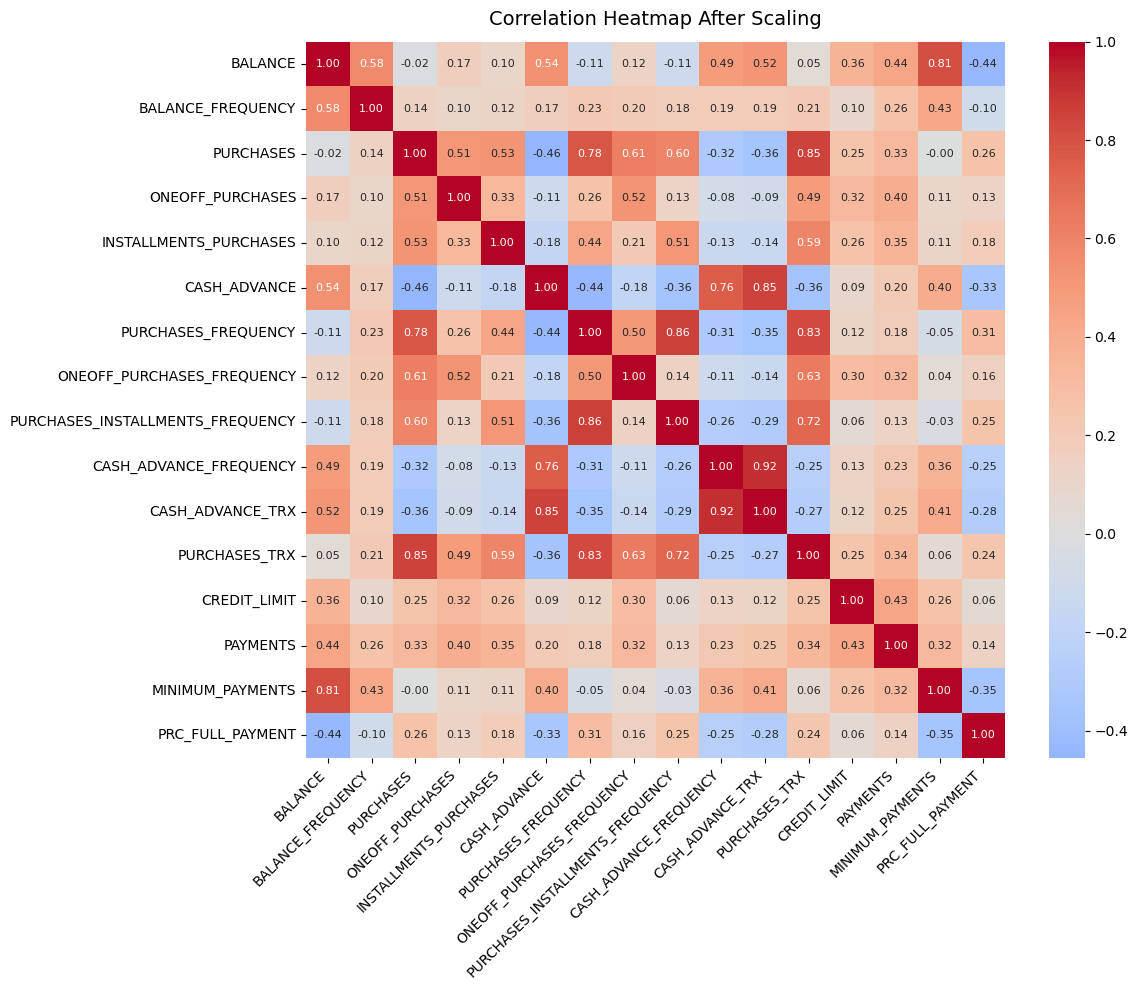

In [34]:
corr_matrix = df_cluster.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(
    corr_matrix,
    cmap='coolwarm',
    center=0,
    annot=True,       
    fmt=".2f",
    annot_kws={"size": 8}
)
plt.title("Correlation Heatmap After Scaling", fontsize=14, pad=12)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
# Since in clustering (especially K-Means or PCA), highly correlated features can overweight certain behavioral dimensions,
# reduce interpretability, and cause artificial clustering directions (since correlated variables move together).
# So we can remove one variable from each highly correlated pair (correlation > 0.85).

In [ ]:
# Features with high unique value that are less correlated and should definitely stay:

# 1-BALANCE
# 2-BALANCE_FREQUENCY
# 3-ONEOFF_PURCHASES
# 4-INSTALLMENTS_PURCHASES
# 5-CREDIT_LIMIT
# 6-PRC_FULL_PAYMENT
# 7-PAYMENTS

# They each represent distinct behavioral or financial characteristics.

In [38]:
# Droping redundant features based on high correlation
df_final = df_scaled.drop(columns=[
    'PURCHASES', 
    'CASH_ADVANCE', 
    'PURCHASES_INSTALLMENTS_FREQUENCY',
    'CASH_ADVANCE_FREQUENCY'
])

df_final.shape

(8950, 13)

In [39]:
df_final

CUST_ID   BALANCE  BALANCE_FREQUENCY  ONEOFF_PURCHASES  \
0     C10001 -1.238103          -0.249434         -0.356934   
1     C10002  1.051961           0.134325         -0.356934   
2     C10003  0.860616           0.518084          0.108889   
3     C10004  0.570542          -1.016953          0.546189   
4     C10005  0.111925           0.518084         -0.347294   
...      ...       ...                ...               ...   
8945  C19186 -1.351366           0.518084         -0.356934   
8946  C19187 -1.465213           0.518084         -0.356934   
8947  C19188 -1.409349          -0.185477         -0.356934   
8948  C19189 -1.558537          -0.185477         -0.356934   
8949  C19190 -0.324310          -0.889033          0.301732   

      INSTALLMENTS_PURCHASES  PURCHASES_FREQUENCY  ONEOFF_PURCHASES_FREQUENCY  \
0                  -0.349079            -0.806490                   -0.678661   
1                  -0.454576            -1.221758                   -0.678661   
2                  -0.454576             1.269843                    2.673451   
3                  -0.454576            -1.014125                   -0.399319   
4                  -0.454576            -1.014125                   -0.399319   
...                      ...                  ...                         ...   
8945               -0.132643             1.269843                   -0.678661   
8946               -0.122823             1.269843                   -0.678661   
8947               -0.294893             0.854576                   -0.678661   
8948               -0.454576            -1.221758                   -0.678661   
8949               -0.454576             0.439310                    1.556082   

      CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  PAYMENTS  \
0            -0.772904      -0.578392     -0.960378 -0.983876   
1             0.629493      -1.136616      0.688678  1.285321   
2            -0.772904       0.230748      0.826100 -0.291722   
3            -0.071706      -0.741892      0.826100 -2.782085   
4            -0.772904      -0.741892     -0.905410 -0.231669   
...                ...            ...           ...       ...   
8945         -0.772904      -0.169743     -0.960378 -0.708925   
8946         -0.772904      -0.169743     -0.960378 -0.807239   
8947         -0.772904      -0.253986     -0.960378 -1.437791   
8948          0.218740      -1.136616     -1.097800 -1.626657   
8949          0.218740       0.756414     -0.905410 -1.549088   

      MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  
0            -0.824388         -0.525551  
1             0.917393          0.234227  
2             0.475906         -0.525551  
3            -0.115812         -0.525551  
4            -0.327305         -0.525551  
...                ...               ...  
8945         -1.782947          1.183951  
8946         -0.115812         -0.525551  
8947         -1.300748          0.329200  
8948         -1.660766          0.329200  
8949         -1.237898         -0.525551  

[8950 rows x 13 columns]

In [40]:
# removing CUST_ID ti have just meaningful numerical features for clustering. We will use it later on the cluster graphs
df_final_with_id = df_final.copy()
df_f = df_final_with_id.drop(columns=['CUST_ID'])
df_f

BALANCE  BALANCE_FREQUENCY  ONEOFF_PURCHASES  INSTALLMENTS_PURCHASES  \
0    -1.238103          -0.249434         -0.356934               -0.349079   
1     1.051961           0.134325         -0.356934               -0.454576   
2     0.860616           0.518084          0.108889               -0.454576   
3     0.570542          -1.016953          0.546189               -0.454576   
4     0.111925           0.518084         -0.347294               -0.454576   
...        ...                ...               ...                     ...   
8945 -1.351366           0.518084         -0.356934               -0.132643   
8946 -1.465213           0.518084         -0.356934               -0.122823   
8947 -1.409349          -0.185477         -0.356934               -0.294893   
8948 -1.558537          -0.185477         -0.356934               -0.454576   
8949 -0.324310          -0.889033          0.301732               -0.454576   

      PURCHASES_FREQUENCY  ONEOFF_PURCHASES_FREQUENCY  CASH_ADVANCE_TRX  \
0               -0.806490                   -0.678661         -0.772904   
1               -1.221758                   -0.678661          0.629493   
2                1.269843                    2.673451         -0.772904   
3               -1.014125                   -0.399319         -0.071706   
4               -1.014125                   -0.399319         -0.772904   
...                   ...                         ...               ...   
8945             1.269843                   -0.678661         -0.772904   
8946             1.269843                   -0.678661         -0.772904   
8947             0.854576                   -0.678661         -0.772904   
8948            -1.221758                   -0.678661          0.218740   
8949             0.439310                    1.556082          0.218740   

      PURCHASES_TRX  CREDIT_LIMIT  PAYMENTS  MINIMUM_PAYMENTS  \
0         -0.578392     -0.960378 -0.983876         -0.824388   
1         -1.136616      0.688678  1.285321          0.917393   
2          0.230748      0.826100 -0.291722          0.475906   
3         -0.741892      0.826100 -2.782085         -0.115812   
4         -0.741892     -0.905410 -0.231669         -0.327305   
...             ...           ...       ...               ...   
8945      -0.169743     -0.960378 -0.708925         -1.782947   
8946      -0.169743     -0.960378 -0.807239         -0.115812   
8947      -0.253986     -0.960378 -1.437791         -1.300748   
8948      -1.136616     -1.097800 -1.626657         -1.660766   
8949       0.756414     -0.905410 -1.549088         -1.237898   

      PRC_FULL_PAYMENT  
0            -0.525551  
1             0.234227  
2            -0.525551  
3            -0.525551  
4            -0.525551  
...                ...  
8945          1.183951  
8946         -0.525551  
8947          0.329200  
8948          0.329200  
8949         -0.525551  

[8950 rows x 12 columns]

In [41]:
print(df_f.columns.tolist())

['BALANCE', 'BALANCE_FREQUENCY', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT']


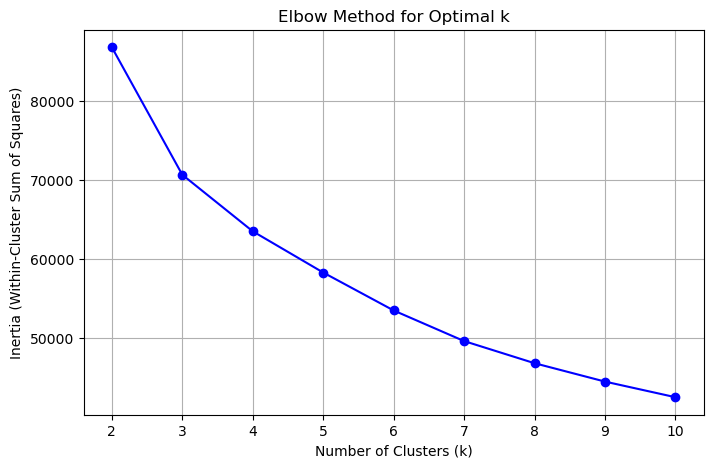

In [42]:
# Using K-mean cluster
# finding the best K with elbow method

from sklearn.cluster import KMeans

K = range(2, 11)

inertia = []  

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_f)
    inertia.append(kmeans.inertia_)


plt.figure(figsize=(8, 5))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Within-Cluster Sum of Squares)')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()

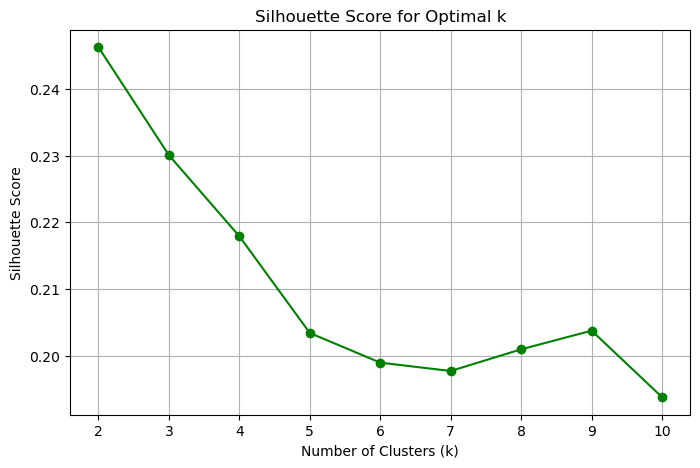

In [43]:
# finding the best K with silhoutte method

from sklearn.metrics import silhouette_score

K = range(2, 11)

silhouette_scores = []

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_f)
    score = silhouette_score(df_f, kmeans.labels_)
    silhouette_scores.append(score)

plt.figure(figsize=(8, 5))
plt.plot(K, silhouette_scores, 'go-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal k')
plt.grid(True)
plt.show()

In [44]:

kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
kmeans.fit(df_f)

df_final_with_id['Cluster'] = kmeans.labels_

df_final_with_id['Cluster'].value_counts()

Cluster
1    3487
3    2765
2    1444
0    1254
Name: count, dtype: int64

In [45]:
numeric_cols = df_final_with_id.select_dtypes(include=['number']).columns
cluster_summary = df_final_with_id.groupby('Cluster')[numeric_cols].mean().round(2)

cluster_summary['Count'] = df_final_with_id['Cluster'].value_counts()
cluster_summary = cluster_summary.sort_index()

cluster_summary

BALANCE  BALANCE_FREQUENCY  ONEOFF_PURCHASES  INSTALLMENTS_PURCHASES  \
Cluster                                                                         
0           0.65               0.45              1.29                    1.10   
1           0.67               0.37             -0.26                   -0.37   
2          -1.34              -1.94             -0.25                   -0.31   
3          -0.45               0.34             -0.13                    0.13   

         PURCHASES_FREQUENCY  ONEOFF_PURCHASES_FREQUENCY  CASH_ADVANCE_TRX  \
Cluster                                                                      
0                       1.10                        1.64             -0.08   
1                      -0.81                       -0.45              0.70   
2                      -0.52                       -0.45             -0.50   
3                       0.80                        0.05             -0.58   

         PURCHASES_TRX  CREDIT_LIMIT  PAYMENTS  MINIMUM_PAYMENTS  \
Cluster                                                            
0                 1.60          1.02      1.07              0.49   
1                -0.71         -0.01      0.08              0.53   
2                -0.47         -0.24     -0.69             -1.07   
3                 0.41         -0.32     -0.22             -0.34   

         PRC_FULL_PAYMENT  Cluster  Count  
Cluster                                    
0                    0.24      0.0   1254  
1                   -0.45      1.0   3487  
2                    0.22      2.0   1444  
3                    0.35      3.0   2765

In [ ]:
# In above table each column is a feature (behavior metric), and each row (Cluster 0–3) shows the average standardized 
# score for that feature. Positive  means above average and Negative means below average.
# because purcahse was highly related to other columns we removed it but we assume that :
# PURCHASES=ONEOFF_PURCHASES+INSTALLMENTS_PURCHASES

# Cluster 0 : High Spenders, active and Responsible Payers(1,254 customers): 
# Their value for PURCHASES, INSTALLMENTS_PURCHASES, PURCHASES_TRX , ONEOFF_PURCHASES_FREQUENCY are high which showing
# they are frequent and heavy on spending and spending a lot spend a lot both in single payments and installments and are 
# very active users because of PURCHASES_TRX and PURCHASES_FREQUENCY. 
# Their BALANCE and CREDIT_LIMIT showing that they are Above average, so they maintain larger balances but they can 
# control it. 
# Their payment behavior(PAYMENTS ,MINIMUM_PAYMENTS,PRC_FULL_PAYMEN  ) showing that they have Strong repayment behavior, 
# pay more than minimum often, and occasionally clear balances fully.
# So it can be said They are premium, high-activity ,high-value customers and heavy card users who also make regular, 
# strong payments.They are profitable and low-risk for the bank.


# Cluster 1 :Moderate Spenders with Cash Dependency (3,487 customers): 
# They Frequently use their card for cash withdrawals(CASH_ADVANCE_TRX = 0.70), Rarely use their card for shopping
# (PURCHASES and PURCHASES_FREQUENCY = negative),Keep high balances, mostly pay the minimum(BALANCE = 0.67, 
# MINIMUM_PAYMENTS = 0.53), and rarely clear their debit fully (PRC_FULL_PAYMENT = -0.45).
# These are credit-dependent or risky users — they rely on their card as a cash loan, not for purchases or borrowing 
# rather than shopping. They have high balances and low repayment discipline, meaning higher credit risk.


# Cluster 2 : Inactive / Low-Engagement Customers( 1,444 customers):
# Almost all features are negative like low BALANCE, PURCHASES, PAYMENTS, and FREQUENCIES.They have Very little spending
# or repayment activity, rarely update their balances, some pay in full, but activity is generally low(PRC_FULL_PAYMENT 
# = 0.22.)
# These are inactive or dormant customers — they rarely use their card and contribute little revenue.Banks might target 
# them with activation offers or reward campaigns to increase usage.


# Cluster 3 : Active Frequent Users with Moderate Spending(2,765 customers):
# They use card frequently, though not for huge amounts(0.80). They try keep it updated often(0.34) and are relatively
# responsible payers and their MINIMUM_PAYMENTS and PAYMENTS showing below average but not low.
# These are regular and balanced users and use their cards often but not heavily.They are medium-value, low-risk 
# customers who can be encouraged to spend more.


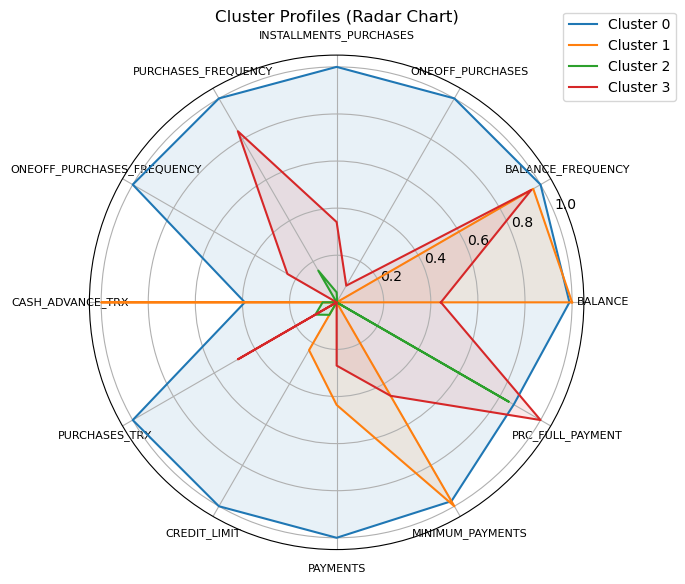

In [56]:
# radar (spider) chart

features = [
    'BALANCE', 'BALANCE_FREQUENCY', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES',
    'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'CASH_ADVANCE_TRX',
    'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT'
]

cluster_means = df_final_with_id.groupby('Cluster')[features].mean()

cluster_means = (cluster_means - cluster_means.min()) / (cluster_means.max() - cluster_means.min())

angles = np.linspace(0, 2 * np.pi, len(features), endpoint=False)
angles = np.concatenate((angles, [angles[0]]))

plt.figure(figsize=(7,7), dpi=100)
ax = plt.subplot(111, polar=True)

for i, row in cluster_means.iterrows():
    values = np.concatenate((row.values, [row.values[0]]))
    ax.plot(angles, values, label=f'Cluster {i}')
    ax.fill(angles, values, alpha=0.1)

ax.set_xticks(angles[:-1])
ax.set_xticklabels(features, fontsize=8)
plt.title("Cluster Profiles (Radar Chart)")
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1.1))
plt.tight_layout()
plt.show()


In [ ]:
# This spider chart visually summarizes how the four customer clusters differ in their average credit card behavior. Each
# color represents one cluster, showing how its members compare in spending, borrowing, and repayment patterns.
# Each axis (or spoke) corresponds to a feature that reflects customer activity, such as balance (average amount owed),
# purchases (total spending), cash advance transactions (use of the card for cash withdrawals), payments (total repayments
# ), and the percentage of full payments (how often customers pay off their balance completely). The distance from the
# center shows the strength of each behavior. Points near the center indicate lower activity, while points farther out 
# represent higher usage or stronger performance. All values are scaled between 0 and 1 to make features comparable.

# In the chart, the blue area(cluster 0) stretches widely across most axes, showing customers with high spending, frequent purchases,
# and strong repayment habits. The orange areas(cluster 1) peaks sharply on cash advances, representing customers who 
# rely on their credit cards mainly for cash and often carry debt. The green line area(cluster 2) close to the center, 
# indicating inactive or low-usage accounts with minimal transactions. The red area( cluster 3) shows moderate spread
# across most features, describing regular and balanced users who maintain steady but controlled credit activity.

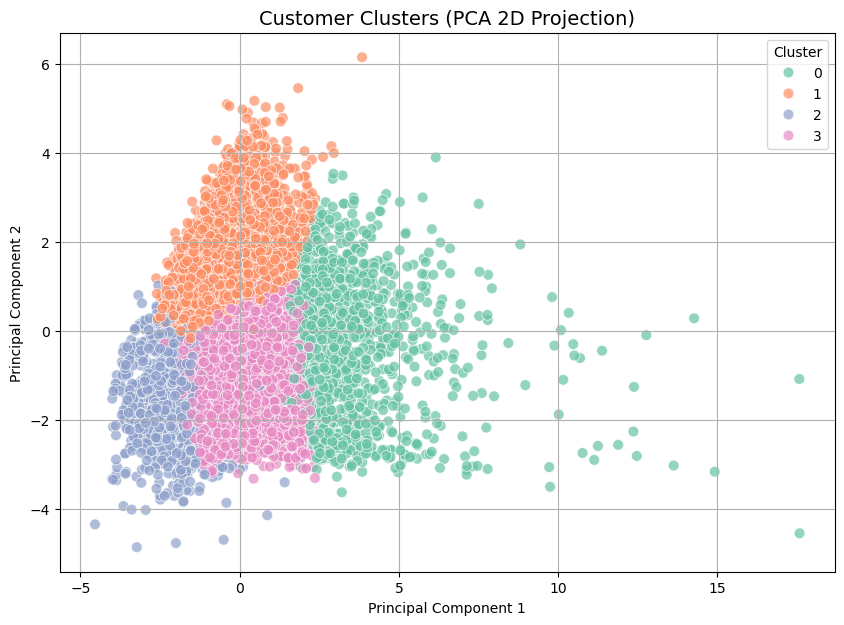

Explained variance ratio: [0.308 0.246]


In [46]:
from sklearn.decomposition import PCA

numeric_cols = df_final.select_dtypes(include=['number']).columns
df_numeric = df_final[numeric_cols]

#  PCA to 2 components
pca = PCA(n_components=2, random_state=42)
pca_components = pca.fit_transform(df_numeric)

pca_df = pd.DataFrame(data=pca_components, columns=['PC1', 'PC2'])
pca_df['Cluster'] = df_final_with_id['Cluster']


plt.figure(figsize=(10, 7))
sns.scatterplot(
    data=pca_df,
    x='PC1', y='PC2',
    hue='Cluster',
    palette='Set2',
    s=60,
    alpha=0.7
)
plt.title('Customer Clusters (PCA 2D Projection)', fontsize=14)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster', loc='best')
plt.grid(True)
plt.show()

print("Explained variance ratio:", pca.explained_variance_ratio_.round(3))

In [ ]:
# This 2D PCA plot shows how customers are grouped into four distinct clusters based on their overall credit card behavior
# after reducing the original features to two principal components(PCA)for visualization. Each color represents a 
# different cluster, and the position of the points shows how similar customers are in terms of their usage patterns.
# It is like points that are close together share similar financial behaviors.
# The orange cluster (Cluster 0) occupies the top-left region.The pink cluster (Cluster 1) lies just below it.The green 
# cluster (Cluster 2) dominates the central region and the blue cluster (Cluster 3) is positioned toward the lower-left.
# The axes, “Principal Component 1” and “Principal Component 2,” are combinations of all original features, capturing the 
# two largest sources of variation in the data. The explained variance ratio (about 30.8% and 24.6%) shows that these two
# components together describe roughly 55% of the total behavioral variation among customers, allowing clear visualization
# of how groups differ.

In [51]:
import plotly.express as px


# PCA with 3 components
pca_3d = PCA(n_components=3, random_state=42)
pca_3d_components = pca_3d.fit_transform(df_numeric)

pca_3d_df = pd.DataFrame(pca_3d_components, columns=['PC1', 'PC2', 'PC3'])
pca_3d_df['Cluster'] = df_final_with_id['Cluster']
pca_3d_df['CUST_ID'] = df_final_with_id['CUST_ID']

hover_features = ['BALANCE', 'PURCHASES', 'CREDIT_LIMIT', 'PAYMENTS']
existing_hover_features = [col for col in hover_features if col in df_final_with_id.columns]

for col in existing_hover_features:
    pca_3d_df[col] = df_final_with_id[col]

fig = px.scatter_3d(
    pca_3d_df,
    x='PC1', y='PC2', z='PC3',
    color='Cluster',
    hover_data=['CUST_ID'] + existing_hover_features,
    title='Customer Clusters (PCA 3D Projection with Hover Info)',
    color_continuous_scale='Viridis',
    opacity=0.8
)


fig.update_traces(marker=dict(size=5))
fig.update_layout(
    scene=dict(
        xaxis_title='Principal Component 1',
        yaxis_title='Principal Component 2',
        zaxis_title='Principal Component 3'
    ),
    legend_title='Cluster'
)

fig.show()


print("Explained variance ratio:", pca_3d.explained_variance_ratio_.round(3))
print("Total variance explained:", round(sum(pca_3d.explained_variance_ratio_), 3))


Explained variance ratio: [0.308 0.246 0.095]
Total variance explained: 0.649


In [52]:
loadings = pd.DataFrame(
    pca_3d.components_.T,
    columns=['PC1', 'PC2', 'PC3'],
    index=df_numeric.columns
)
loadings.round(3)

PC1    PC2    PC3
BALANCE                     0.233  0.490 -0.094
BALANCE_FREQUENCY           0.238  0.240 -0.479
ONEOFF_PURCHASES            0.340 -0.069  0.267
INSTALLMENTS_PURCHASES      0.324 -0.119  0.003
PURCHASES_FREQUENCY         0.336 -0.291 -0.359
ONEOFF_PURCHASES_FREQUENCY  0.362 -0.133 -0.016
CASH_ADVANCE_TRX           -0.005  0.426  0.200
PURCHASES_TRX               0.425 -0.232 -0.202
CREDIT_LIMIT                0.280  0.115  0.485
PAYMENTS                    0.343  0.145  0.372
MINIMUM_PAYMENTS            0.198  0.436 -0.156
PRC_FULL_PAYMENT            0.087 -0.348  0.288

In [ ]:
# This table shows how each original feature contributes to the three principal components (PC1, PC2, and PC3) used in 
# the PCA analysis. Each number represents a loading, meaning the strength and direction of that feature’s influence on 
# each principal component.

# PC1 has strong positive loadings on PURCHASES_TRX, ONEOFF_PURCHASES, PURCHASES_FREQUENCY, and PAYMENTS which means PC1
# mainly represents overall purchasing and payment activity. Higher values indicate customers who make many purchases and
# payments.

# PC2 is most influenced by BALANCE, MINIMUM_PAYMENTS, and CASH_ADVANCE_TRX.
# This component reflects credit usage and debt behavior, capturing how much balance customers carry and whether they rely
# on cash advances or make only minimum payments.

# PC3 is strongly affected by CREDIT_LIMIT, PAYMENTS, and PRC_FULL_PAYMENT.
# This one highlights credit capacity and repayment responsibility and  higher scores indicate customers with larger 
# credit limits and more consistent full payments.

# so:

# PC1 = active spending and purchasing behavior
# PC2 = debt and balance management
# PC3 = repayment responsibility and credit capacity.

In [53]:
# tuning some parameters to see if there would be good K for better clustering. 

from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

labels = kmeans.labels_
print("Silhouette:", silhouette_score(df_f, labels))
print("Davies-Bouldin:", davies_bouldin_score(df_f, labels))
print("Calinski-Harabasz:", calinski_harabasz_score(df_f, labels))

Silhouette: 0.21789570957959317
Davies-Bouldin: 1.5587120793545286
Calinski-Harabasz: 2062.029806851124


In [ ]:
# Silhouette Score: Measures how well each point fits within its cluster compared to other clusters and ranges from –1 to
# +1 and +1 means points are very well grouped (clear separation).
# value (0.22) means the clusters are moderately distinct and not bad, but there’s some overlap.

# Davies–Bouldin Index: Measures the average similarity between clusters or how close and spread out they are. Lower is
# better which means small values mean clusters are compact and far apart.
# score (1.56) suggests some overlap between clusters they’re not perfectly separated.

# Calinski–Harabasz Index (2062.03): Compares cluster separation (between-cluster distance) to compactness 
# (within-cluster distance). Higher is better and large values mean dense, well-separated clusters.
# score (~2062) is quite solid, meaning the clusters are reasonably well defined overall.

In [54]:
from sklearn.metrics import silhouette_score

scores = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=20)
    labels = kmeans.fit_predict(df_f)
    score = silhouette_score(df_f, labels)
    scores.append((k, score))

pd.DataFrame(scores, columns=['k', 'Silhouette'])

k  Silhouette
0  2    0.246269
1  3    0.230238
2  4    0.217896
3  5    0.204012
4  6    0.198933
5  7    0.197685
6  8    0.200939
7  9    0.202598

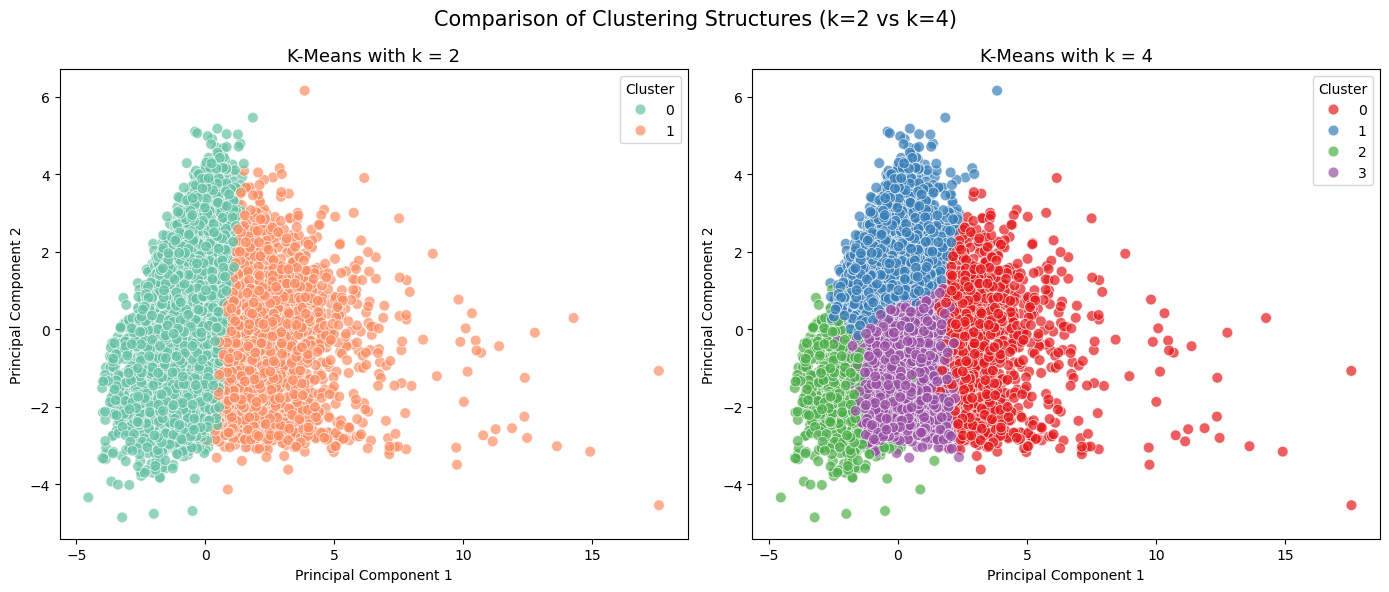

In [57]:
# trying with K=2 and visulaizing it beside k=4

kmeans2 = KMeans(n_clusters=2, random_state=42, n_init=20)
kmeans4 = KMeans(n_clusters=4, random_state=42, n_init=20)

labels2 = kmeans2.fit_predict(df_numeric)
labels4 = kmeans4.fit_predict(df_numeric)

pca = PCA(n_components=2, random_state=42)
pca_components = pca.fit_transform(df_numeric)

pca_df = pd.DataFrame(pca_components, columns=["PC1", "PC2"])
pca_df["Cluster_k2"] = labels2
pca_df["Cluster_k4"] = labels4


fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.scatterplot(
    data=pca_df, x="PC1", y="PC2", hue="Cluster_k2",
    palette="Set2", s=60, alpha=0.7, ax=axes[0]
)
axes[0].set_title("K-Means with k = 2", fontsize=13)
axes[0].set_xlabel("Principal Component 1")
axes[0].set_ylabel("Principal Component 2")
axes[0].legend(title="Cluster")

sns.scatterplot(
    data=pca_df, x="PC1", y="PC2", hue="Cluster_k4",
    palette="Set1", s=60, alpha=0.7, ax=axes[1]
)
axes[1].set_title("K-Means with k = 4", fontsize=13)
axes[1].set_xlabel("Principal Component 1")
axes[1].set_ylabel("Principal Component 2")
axes[1].legend(title="Cluster")

plt.suptitle("Comparison of Clustering Structures (k=2 vs k=4)", fontsize=15)
plt.tight_layout()
plt.show()

In [58]:
labels = kmeans2.labels_
print("Silhouette:", silhouette_score(df_f, labels))
print("Davies-Bouldin:", davies_bouldin_score(df_f, labels))
print("Calinski-Harabasz:", calinski_harabasz_score(df_f, labels))

Silhouette: 0.24626855324384822
Davies-Bouldin: 1.7593020764968328
Calinski-Harabasz: 2120.608247594492


In [ ]:
In Silhouette higher (k=2),the two big groups are more separated, because there are fewer cluster boundaries.
For Davies–Bouldin lower (k=4), the four smaller clusters are more compact and balanced internally.
For Calinski–Harabasz, both( k=2, k=4) are strong, meaning the data has real structure either way.

In [ ]:
While k = 2 performs slightly better numerically (with a higher Silhouette score), it only divides customers into two
broad, general categories and misses finer distinctions.
In contrast, k = 4 produces more detailed and interpretable segments that better reflect real-world customer diversity.
It identifies meaningful behavioral types, such as high spenders, cash users, low-activity customers, and balanced users.
Therefore, k = 4 provides a richer and more actionable understanding of customer behavior, even if the metrics are only
slightly lower.

In [ ]:
# Now trying GMM methods (Gaussian Mixture Model)

In [66]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

df_gmm = df_f.copy()

In [70]:
# Training GMM model with 2 components
gmm = GaussianMixture(n_components=2, random_state=42)
gmm_labels = gmm.fit_predict(df_gmm)

df_final_with_id['GMM_Cluster'] = gmm_labels

In [71]:
sil = silhouette_score(df_gmm, gmm_labels)
db = davies_bouldin_score(df_gmm, gmm_labels)
ch = calinski_harabasz_score(df_gmm, gmm_labels)

print(f"Silhouette Score: {sil:.4f}")
print(f"Davies-Bouldin Index: {db:.4f}")
print(f"Calinski-Harabasz Index: {ch:.4f}")

Silhouette Score: 0.1416
Davies-Bouldin Index: 2.5996
Calinski-Harabasz Index: 1089.9096


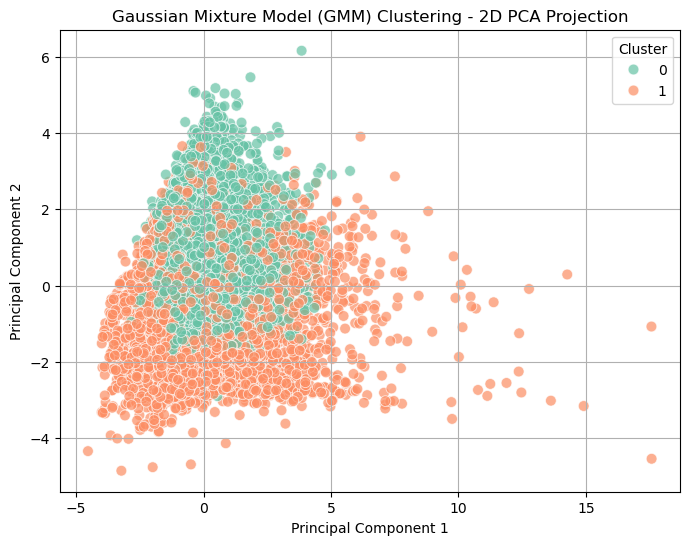

Explained variance ratio: [0.308 0.246]


In [72]:

pca = PCA(n_components=2, random_state=42)
pca_components = pca.fit_transform(df_gmm)

pca_df = pd.DataFrame(pca_components, columns=['PC1', 'PC2'])
pca_df['Cluster'] = gmm_labels

# Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Cluster', palette='Set2', s=60, alpha=0.7)
plt.title("Gaussian Mixture Model (GMM) Clustering - 2D PCA Projection")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Cluster")
plt.grid(True)
plt.show()

print("Explained variance ratio:", pca.explained_variance_ratio_.round(3))

In [73]:
cluster_summary = df_final_with_id.groupby('GMM_Cluster')[df_final_with_id.select_dtypes(include='number').columns].mean().round(2)

cluster_summary['Count'] = df_final_with_id['GMM_Cluster'].value_counts().sort_index()
cluster_summary

BALANCE  BALANCE_FREQUENCY  ONEOFF_PURCHASES  \
GMM_Cluster                                                 
0               0.52               0.52             -0.16   
1              -0.58              -0.58              0.18   

             INSTALLMENTS_PURCHASES  PURCHASES_FREQUENCY  \
GMM_Cluster                                                
0                             -0.19                -0.16   
1                              0.22                 0.18   

             ONEOFF_PURCHASES_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  \
GMM_Cluster                                                                
0                                 -0.09              0.27          -0.18   
1                                  0.11             -0.31           0.20   

             CREDIT_LIMIT  PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  \
GMM_Cluster                                                               
0                   -0.04     -0.02              0.42             -0.48   
1                    0.04      0.02             -0.48              0.54   

             Cluster  GMM_Cluster  Count  
GMM_Cluster                               
0               1.49          0.0   4737  
1               1.81          1.0   4213

In [75]:
# trying to to change some key parameter(covariance_typ) of GMM

from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

cov_types = ['full', 'tied', 'diag', 'spherical']
best_score = -1
best_params = None

for cov in cov_types:
    gmm = GaussianMixture(n_components=2, covariance_type=cov, random_state=42, n_init=5, reg_covar=1e-4)
    labels = gmm.fit_predict(df_f)
    sil = silhouette_score(df_f, labels, sample_size=2000, random_state=42)
    print(f"Covariance: {cov}, Silhouette: {sil:.4f}")
    
    if sil > best_score:
        best_score = sil
        best_params = cov

print("\n Best covariance type:", best_params, "with Silhouette:", round(best_score, 4))


Covariance: full, Silhouette: 0.1292
Covariance: tied, Silhouette: 0.2623
Covariance: diag, Silhouette: 0.1369
Covariance: spherical, Silhouette: 0.1219

 Best covariance type: tied with Silhouette: 0.2623


In [ ]:
# Cov type /tied' is 0.262 which is the Best separation , compact, stable clusters. 

In [83]:
# Now trying the best version K=2, and Covariance: tied
best_gmm = GaussianMixture(n_components=2, covariance_type='tied', random_state=42, n_init=5, reg_covar=1e-4)
best_gmm_labels = best_gmm.fit_predict(df_f)

sil = silhouette_score(df_f, best_gmm_labels, sample_size=2000, random_state=42)
print("Final Silhouette:", round(sil, 4))

df_final_with_id['GMM_Cluster'] = best_gmm_labels

cluster_summary = (
    df_final_with_id.drop(columns=['CUST_ID'], errors='ignore')
    .groupby('GMM_Cluster')
    .mean()
    .round(2)
)
cluster_summary['Count'] = df_final_with_id['GMM_Cluster'].value_counts().sort_index()
cluster_summary

Final Silhouette: 0.2623


BALANCE  BALANCE_FREQUENCY  ONEOFF_PURCHASES  \
GMM_Cluster                                                 
0              -0.05              -0.08             -0.22   
1               0.25               0.40              1.04   

             INSTALLMENTS_PURCHASES  PURCHASES_FREQUENCY  \
GMM_Cluster                                                
0                             -0.10                -0.21   
1                              0.47                 0.99   

             ONEOFF_PURCHASES_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  \
GMM_Cluster                                                                
0                                 -0.41              0.05          -0.26   
1                                  1.94             -0.22           1.22   

             CREDIT_LIMIT  PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  \
GMM_Cluster                                                               
0                   -0.12     -0.13             -0.02             -0.07   
1                    0.57      0.63              0.10              0.35   

             Cluster  Count  
GMM_Cluster                  
0               1.76   7395  
1               1.06   1555

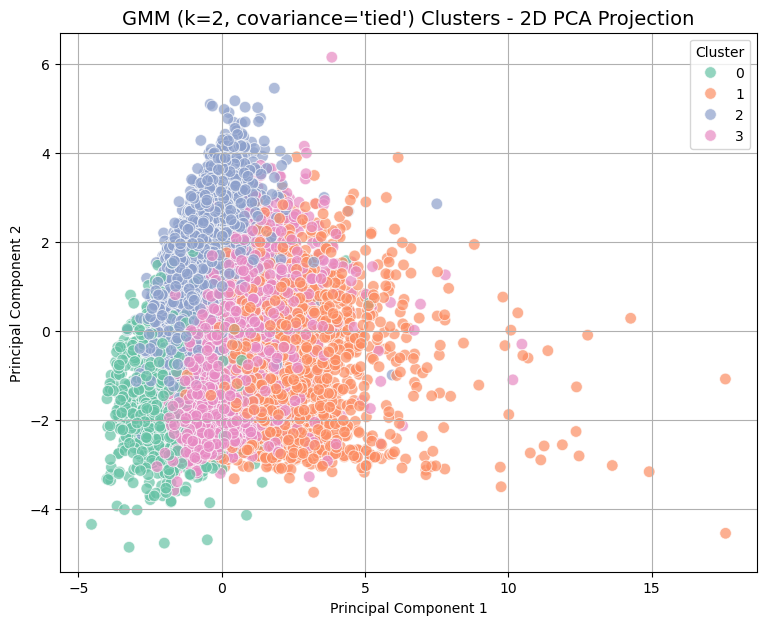

In [82]:
pca = PCA(n_components=4, random_state=42)
pca_result = pca.fit_transform(df_f)


pca_df = pd.DataFrame(pca_result, columns=['PC1', 'PC2', 'PC3', 'PC4'])
pca_df['Cluster'] = df_final_with_id['GMM_Cluster']

plt.figure(figsize=(9, 7))
sns.scatterplot(
    data=pca_df,
    x='PC1', y='PC2',
    hue='Cluster',
    palette='Set2',
    s=70, alpha=0.7
)
plt.title("GMM (k=2, covariance='tied') Clusters - 2D PCA Projection", fontsize=14)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Cluster")
plt.grid(True)
plt.show()

In [ ]:
# K-Means and GMM both uncover meaningful customer groups but differ in how they define them. K-Means creates clear, 
# distinct clusters, while GMM models softer, overlapping boundaries between groups. Although GMM with n=2 gives a 
# slightly higher Silhouette score (0.26), it forms less sharply separated clusters. K-Means with k=4 provides still 
# cleaner, more interpretable segments, making it better for practical customer analysis.
# However, if the goal is a probabilistic approach for estimating the likelihood that each customer belongs to multiple 
# clusters—GMM is the preferred model.

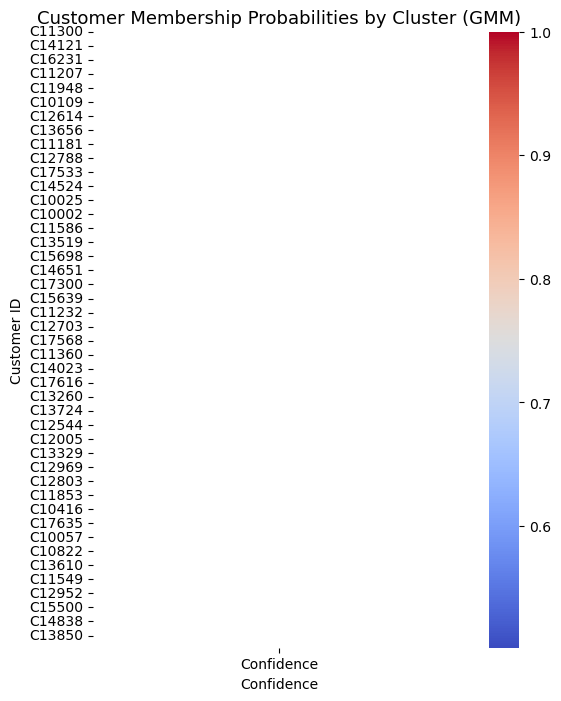

In [88]:
# the probabality that every costumers belong to which cluster # k=2
probs = best_gmm.predict_proba(df_f)

max_probs = probs.max(axis=1)  

conf_df = pd.DataFrame({
    'CUST_ID': df_final_with_id['CUST_ID'],
    'Confidence': max_probs
}).set_index('CUST_ID').sort_values('Confidence', ascending=False)

plt.figure(figsize=(6, 8))
sns.heatmap(
    conf_df[['Confidence']],
    cmap='coolwarm',
    cbar=True,
    linewidths=0.3
)
plt.title("Customer Membership Probabilities by Cluster (GMM)", fontsize=13)
plt.xlabel("Confidence")
plt.ylabel("Customer ID")
plt.show()

In [ ]:
This graph shows how confident or the probabality the GMM model is about assigning each customer to their cluster.Each 
row represents one customer, and the color indicates their membership confidence. Dark red means the model is very sure
the customer fits their cluster (high probability, close to 1). Lighter or bluish shades mean the model is less certain,
suggesting the customers behavior overlaps between clusters. For example, if Customer C11300 appears in dark red, it
means the model is highly confident that this customer clearly belongs to their assigned cluster.

In [ ]:
# In the next we will try hierarchical clustering

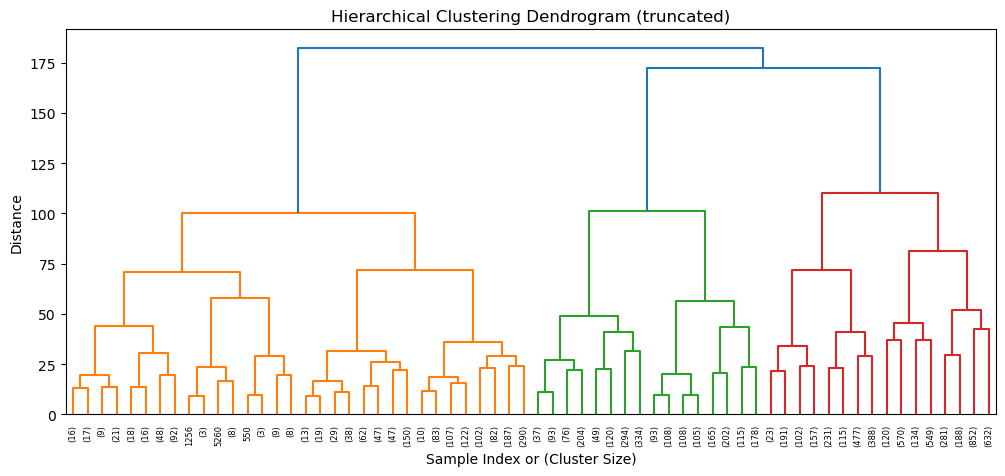

In [89]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, dendrogram


linkage_matrix = linkage(df_f, method='ward')  


plt.figure(figsize=(12, 5))
dendrogram(linkage_matrix, truncate_mode='level', p=5) 
plt.title("Hierarchical Clustering Dendrogram (truncated)")
plt.xlabel("Sample Index or (Cluster Size)")
plt.ylabel("Distance")
plt.show()

In [ ]:
# This dendrogram shows how customer groups were formed step by step in hierarchical clustering. Each branch is showing 
# clusters being merged together based on how similar they are. The y-axis shows the distance or dissimilarity between
# clusters when they merge. If we cut the tree at distance = 100, we get about 4 clusters, while cutting at 125 merges 
# everything into 1 cluster. It means the lower branches show smaller, similar groups, and the higher ones show broader,
# combined clusters.

In [90]:
agg = AgglomerativeClustering(
    n_clusters=4,          
    metric='euclidean',    
    linkage='ward'         
)

df_final_with_id['Agglo_Cluster'] = agg.fit_predict(df_f)

print(df_final_with_id['Agglo_Cluster'].value_counts())

Agglo_Cluster
2    3326
0    2281
3    1684
1    1659
Name: count, dtype: int64


In [91]:
labels = df_final_with_id['Agglo_Cluster']

silhouette = silhouette_score(df_f, labels)
dbi = davies_bouldin_score(df_f, labels)
ch = calinski_harabasz_score(df_f, labels)

# Display results
print(f"Silhouette Score: {silhouette:.4f}")
print(f"Davies-Bouldin Index: {dbi:.4f}")
print(f"Calinski-Harabasz Index: {ch:.4f}")

Silhouette Score: 0.1344
Davies-Bouldin Index: 1.7837
Calinski-Harabasz Index: 1602.7016


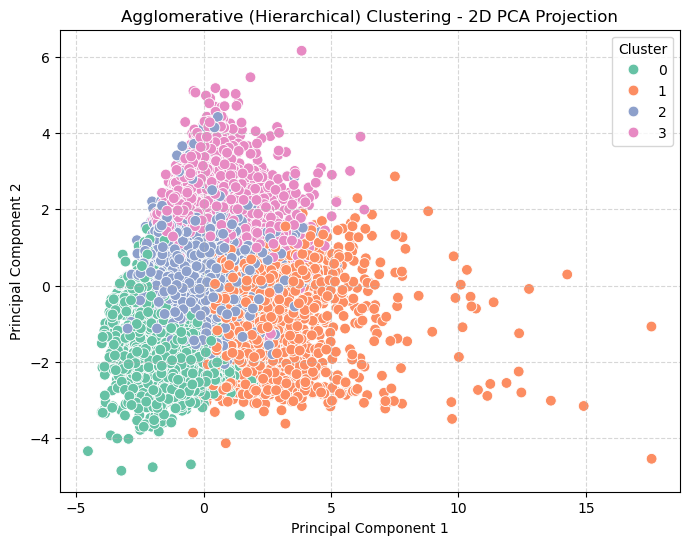

Explained variance ratio (PC1 + PC2): 0.554


In [92]:
pca = PCA(n_components=2, random_state=42)
pca_components = pca.fit_transform(df_f)

pca_df = pd.DataFrame(pca_components, columns=['PC1', 'PC2'])
pca_df['Cluster'] = df_final_with_id['Agglo_Cluster']

plt.figure(figsize=(8,6))
sns.scatterplot(
    data=pca_df,
    x='PC1', y='PC2',
    hue='Cluster',
    palette='Set2',
    s=60
)
plt.title("Agglomerative (Hierarchical) Clustering - 2D PCA Projection")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title='Cluster')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

print("Explained variance ratio (PC1 + PC2):", round(sum(pca.explained_variance_ratio_), 3))

In [93]:
cluster_summary = (
    df_final_with_id
    .groupby('Agglo_Cluster')[df_final_with_id.select_dtypes(include='number').columns]
    .mean()
    .round(2)
)

cluster_summary['Count'] = df_final_with_id['Agglo_Cluster'].value_counts().sort_index()
cluster_summary

BALANCE  BALANCE_FREQUENCY  ONEOFF_PURCHASES  \
Agglo_Cluster                                                 
0                -1.18              -1.12             -0.28   
1                 0.16               0.40              1.00   
2                 0.18               0.36             -0.21   
3                 1.09               0.41             -0.20   

               INSTALLMENTS_PURCHASES  PURCHASES_FREQUENCY  \
Agglo_Cluster                                                
0                               -0.11                 0.07   
1                                0.66                 1.01   
2                               -0.11                -0.22   
3                               -0.29                -0.66   

               ONEOFF_PURCHASES_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  \
Agglo_Cluster                                                                
0                                   -0.52             -0.55          -0.16   
1                                    1.68             -0.43           1.26   
2                                   -0.33             -0.09          -0.23   
3                                   -0.31              1.35          -0.56   

               CREDIT_LIMIT  PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  \
Agglo_Cluster                                                               
0                     -0.37     -0.56             -0.92              0.59   
1                      0.55      0.65              0.02              0.44   
2                     -0.33     -0.25              0.16             -0.41   
3                      0.61      0.61              0.91             -0.42   

               Cluster  GMM_Cluster  Agglo_Cluster  Count  
Agglo_Cluster                                              
0                 2.35         0.01            0.0   2281  
1                 1.18         0.80            1.0   1659  
2                 1.76         0.03            2.0   3326  
3                 0.90         0.08            3.0   1684

In [ ]:
# doing some parameter tuning 

In [94]:
# different n_clusters

for k in range(2, 9):
    agg = AgglomerativeClustering(n_clusters=k, metric='euclidean', linkage='ward')
    labels = agg.fit_predict(df_f)
    sil = silhouette_score(df_f, labels)
    print(f"k={k}, Silhouette={sil:.4f}")

k=2, Silhouette=0.2501
k=3, Silhouette=0.2062
k=4, Silhouette=0.1344
k=5, Silhouette=0.1410
k=6, Silhouette=0.1501
k=7, Silhouette=0.1325
k=8, Silhouette=0.1388


In [95]:
# different linkage

for link in ['ward', 'complete', 'average', 'single']:
    agg = AgglomerativeClustering(n_clusters=4, metric='euclidean', linkage=link)
    labels = agg.fit_predict(df_f)
    sil = silhouette_score(df_f, labels)
    print(f"Linkage={link}, Silhouette={sil:.4f}")

Linkage=ward, Silhouette=0.1344
Linkage=complete, Silhouette=0.5470
Linkage=average, Silhouette=0.7155
Linkage=single, Silhouette=0.8121


In [96]:
# different affinity or metrics

for metric in ['euclidean', 'manhattan', 'cosine']:
    agg = AgglomerativeClustering(n_clusters=4, metric=metric, linkage='average')
    labels = agg.fit_predict(df_f)
    sil = silhouette_score(df_f, labels)
    print(f"Metric={metric}, Silhouette={sil:.4f}")

Metric=euclidean, Silhouette=0.7155
Metric=manhattan, Silhouette=0.7285
Metric=cosine, Silhouette=0.1030


In [98]:
#  Fitting the tuned model
agg_best = AgglomerativeClustering(
    n_clusters=2,           # best number of clusters
    metric='manhattan',      # best distance metric
    linkage='average'       # best linkage method
)

df_final_with_id['Agglo_Best'] = agg_best.fit_predict(df_f)

labels = df_final_with_id['Agglo_Best']

silhouette = silhouette_score(df_f, labels)
dbi = davies_bouldin_score(df_f, labels)
ch = calinski_harabasz_score(df_f, labels)

print(f"Tuned Agglomerative Model Results:")
print(f"Silhouette Score: {silhouette:.4f}")
print(f"Davies-Bouldin Index: {dbi:.4f}")
print(f"Calinski-Harabasz Index: {ch:.4f}")


Tuned Agglomerative Model Results:
Silhouette Score: 0.8223
Davies-Bouldin Index: 0.1254
Calinski-Harabasz Index: 52.9758


In [99]:
df_final_with_id['Agglo_Best'].value_counts()

Agglo_Best
0    8949
1       1
Name: count, dtype: int64

In [ ]:
# The Agglomerative model show excellent metric values (Silhouette 0.82, Davies–Bouldin 0.12), but they are misleading.
# Almost all customers (8,949) fall into one cluster, and only one customer forms the second cluster.
# This extreme imbalance means the model didn’t find real structure and we can say its “good” scores come from poor 
# cluster distribution in which it could not classify the financial bhevavior of the customers in a good way. 
# In contrast, K-Means (k = 4) created balanced, interpretable clusters with realistic separation (Silhouette ≈ 0.22).
# GMM gave similar results but with overlapping, probabilistic clusters.
# While Agglomerative seems perfect by numbers, it’s not meaningful for analysis or segmentation.Therefore, K-Means 
# (k = 4) remains still the best and most practical clustering model for your dataset.

In [100]:
# Now goign for DBscan :

from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=1.5, min_samples=5, metric='euclidean')
dbscan_labels = dbscan.fit_predict(df_f)

df_final_with_id['DBSCAN_Cluster'] = dbscan_labels

print(df_final_with_id['DBSCAN_Cluster'].value_counts().sort_index())

DBSCAN_Cluster
-1     616
 0    8324
 1      10
Name: count, dtype: int64


In [101]:
mask = df_final_with_id['DBSCAN_Cluster'] != -1  # Excluding noise
X_valid = df_f[mask]
labels_valid = df_final_with_id.loc[mask, 'DBSCAN_Cluster']

if len(set(labels_valid)) > 1:  # Avoid single cluster
    sil = silhouette_score(X_valid, labels_valid)
    db = davies_bouldin_score(X_valid, labels_valid)
    ch = calinski_harabasz_score(X_valid, labels_valid)

    print(f"Silhouette Score: {sil:.4f}")
    print(f"Davies-Bouldin Index: {db:.4f}")
    print(f"Calinski-Harabasz Index: {ch:.4f}")

Silhouette Score: 0.2009
Davies-Bouldin Index: 0.9895
Calinski-Harabasz Index: 18.1088


In [102]:
# Tuning Parameters (ε and min_samples)
# We’ll test multiple combinations to find the best.


results = []

for eps in np.arange(0.5, 3.0, 0.2):
    for min_samples in [3, 5, 8, 10]:
        model = DBSCAN(eps=eps, min_samples=min_samples, metric='euclidean')
        labels = model.fit_predict(df_f)

        # excluding noise (-1)
        unique_labels = set(labels)
        n_clusters = len(unique_labels - {-1})

        
        if n_clusters < 2:
            continue

       
        mask = labels != -1
        sil = silhouette_score(df_f[mask], labels[mask])
        results.append((eps, min_samples, n_clusters, sil))


tune_df = pd.DataFrame(results, columns=['eps', 'min_samples', 'n_clusters', 'Silhouette'])
print(tune_df.sort_values(by='Silhouette', ascending=False).head(10))


    eps  min_samples  n_clusters  Silhouette
28  2.7            3           2    0.680921
29  2.9            3           2    0.680452
25  1.9            5           2    0.510697
27  2.5            3           2    0.510079
26  2.1            3           3    0.466453
24  1.9            3          10    0.215052
20  1.5            5           2    0.200896
23  1.7            8           2    0.194679
22  1.7            5           3    0.191200
18  1.3            8           2    0.175377


In [ ]:
# we will try eps = 2.7, min_samples = 3, giving 2 clusters with a Silhouette Score ≈ 0.68.

In [104]:
dbscan_best = DBSCAN(eps=2.7, min_samples=3, metric='euclidean')
dbscan_labels = dbscan_best.fit_predict(df_f)

df_final_with_id['DBSCAN_Best'] = dbscan_labels
print(df_final_with_id['DBSCAN_Best'].value_counts().sort_index())

DBSCAN_Best
-1      50
 0    8897
 1       3
Name: count, dtype: int64


In [105]:
mask = df_final_with_id['DBSCAN_Best'] != -1
X_valid = df_f[mask]
labels_valid = df_final_with_id.loc[mask, 'DBSCAN_Best']

sil = silhouette_score(X_valid, labels_valid)
dbi = davies_bouldin_score(X_valid, labels_valid)
ch = calinski_harabasz_score(X_valid, labels_valid)

print(f"Silhouette Score: {sil:.4f}")
print(f"Davies-Bouldin Index: {dbi:.4f}")
print(f"Calinski-Harabasz Index: {ch:.4f}")

Silhouette Score: 0.6809
Davies-Bouldin Index: 0.3398
Calinski-Harabasz Index: 50.7926


In [ ]:
# DBSCAN also like Hierachial model mostly grouped almost all customers into one large cluster, with a few outliers and a 
# tiny secondary group.It produced high metric scores, but they’re misleading because the clustering is unbalanced and not
# meaningful. This happened maybe because DBSCAN relies on density differences, and the data is uniform and continuous, not 
# forming distinct dense regions. As a result, K-Means still performes better for this dataset, giving clearer and more 
# useful customer segments.

In [ ]:
# Conclusion:

# In this study, several clustering algorithms like K-Means, Gaussian Mixture Model (GMM), Agglomerative (Hierarchical) 
# Clustering, and DBSCAN were applied to segment customers based on their credit card usage behavior. The goal was to
# identify meaningful groups of customers with similar spending, payment, and balance patterns.
# After data scaling and dimensionality reduction using PCA, we evaluated each model using performance metrics such as 
# the Silhouette Score, Davies–Bouldin Index, and Calinski–Harabasz Index. Although the Agglomerative and DBSCAN models 
# showed numerically high scores, both suffered from imbalanced results, producing one dominant cluster and a few outliers
# which makes them statistically good but practically meaningless.
# The GMM model performed slightly better in capturing probabilistic, overlapping clusters, but its separation was still
# weak.In contrast, K-Means with k = 4 provided balanced, interpretable, and realistic clusters, to some degree clearly
# distinguishing high spenders, cash users, low-activity customers, and moderate, responsible users.
# Overall, K-Means (k = 4) proved to be the most effective and actionable model for this dataset, offering valuable 
# insights into customer behavior that can support targeted marketing, credit management, and customer retention
# strategies.